# Exploratory Analysis:

## Introduction

### Main question

The goal of this exploratory analysis is to determine what makes a song successful enough to be featured on the Billboard charts.

### Data Sources

- **Billboard data**: Historical chart data from Billboards.
- **Spotify data**: Artist information and audio features for tracks available on Spotify.

## Data loading and cleaning 

### My process 

I start off by inspecting the the data to better understand the structure, quality, and key characteristics of the dataset. What I look out for during the inspection:
- Data types: I verify that each column has the correct data type (e.g., integers, floats, strings).
- Data completeness: I check for any missing or null values in the dataset.
- Duplicates: I look for duplicated rows in the dataset.
- Unique values: I identify unique values in categorical columns to understand the diversity of the data.
- Descriptive statistics: I calculate basic statistics (mean, median, standard deviation) for numerical columns to get an overview of the data distribution.
- Outliers: I look for any outliers or anomalies that might affect the analysis.
- Error: I look out for any obvious errors or inconsistencies.

Before moving on to the analysis I clean the data by correcting obvious errors, handling missing values, and ensuring consistency. How I clean the data:
- Removing Duplicates: I search for and remove any duplicated rows to maintain unique records.
- Handling Missing Values: I identify missing values and decide whether to impute them with appropriate values or remove the incomplete rows.
- Correcting Data Types: I verify and correct the data types of each column (e.g., converting strings to dates).
- Standardizing Formats: I standardize formats for consistency, such as ensuring uniform date formats and categorical values.
- Removing Outliers: I detect and address outliers that could distort the analysis.
- Renaming Columns: I rename columns to improve clarity and consistency.
- Filtering Data: I filter the dataset to include only the relevant records for my analysis.

### Imports

Importing key python libraries: 
- load_credentials_from_file: Used to load Google Cloud credentials from a .json file, allowing authenticated access to Google Cloud services.
- Client: Used to create a client for interacting with Google BigQuery. 
- pandas: Used to work with dataframes, a powerful way of conduct data manipulation and analysis in python.
- matplotlib.pyplot: Used to create static, interactive, and animated visualizations in python. 
- seaborn: Used to create statistical data visualizations in python, built on top of matplotlib.
- os: Used to interact with the operating system

In [1]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', None)
sns.set_theme()

### Loading data from BigQuery

#### Credential and query 

Loading Google Cloud credentials from service_account.json in root and interacting with Google BigQuery 

In [3]:
# accessing bigquery credentials from local file 
credentials, project_id = load_credentials_from_file('service_account.json')

In [4]:
# Load data from BigQuery
client = Client(
    project = project_id,
    credentials=credentials
)

In [5]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [6]:
# creating a data loading function 
def load_data(table): 
    # selecting table
    query = f"SELECT * FROM `da26-python.music_data.{table}`" 
    # creating query job and transforming to dataframe  
    load_job = client.query(query)
    data = load_job.to_dataframe() 
    # return dataframe 
    return data

#### Load artist data

In [7]:
# loading artist table 
artists = load_data('artists')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [8]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


#### Load audio features data

In [9]:
# loading audio_features table 
audio_features = load_data('audio_features')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [10]:
audio_features.sample(5)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
291,2DEZmgHKAvm41k4J3R2E9Y,0.607,0.829,2.0,-4.074,1.0,0.3790,0.01030,0.000,0.107,0.685,96.172,4.0
10740,1p149YJfXkHkSzYp4UZUxV,0.631,0.714,5.0,-7.259,0.0,0.3550,0.02720,0.000,0.564,0.653,87.980,4.0
8797,7iv2SMNIgKxXerLuGNAXKC,0.644,0.445,10.0,-7.428,0.0,0.0330,0.00482,0.945,0.233,0.509,100.050,4.0
6419,5uQOauh47VFt3B2kV9kRXw,0.812,0.621,5.0,-8.300,1.0,0.0515,0.24400,0.000,0.099,0.847,77.998,4.0
10070,0bF8vEqQyvTfAMWkbP7MnY,0.679,0.528,7.0,-7.901,1.0,0.0267,0.07540,0.000,0.120,0.274,99.035,4.0


#### Load chart positions data

In [11]:
# loading chart_positions table 
chart_positions = load_data('chart_positions')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [12]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


#### Load tracks data

In [13]:
# loading tracks table 
tracks = load_data('tracks')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [14]:
tracks.head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
1,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False
2,1dtIaSlyrLI04sqYa8nLyN,Rudolph the Red-Nosed Reindeer,186733,1947,album,False
3,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False


#### Load tracks artists mapping data

In [15]:
# loading tracks_artists_mapping table 
tracks_artists_mapping = load_data('tracks_artists_mapping')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [16]:
tracks_artists_mapping.head()

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv


### Inital inspection 

#### Artists 

In [17]:
# initial inspection
artists.sample(10)

,artist_id,name,popularity,followers
2402,5Zq7R5qmi58ByYyBQTlNuk,Lee Brice,71,2289196
2888,1wZtkThiXbVNtj6hee6dz9,Wisin & Yandel,80,7767533
2939,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,82,9867041
895,30I8GIK3UqVyAg58557mdJ,Jack Joseph Puig,49,900
305,24VF2kZrBFn1WvJ5oF1SRf,Chad Brock,30,43299
1541,164hs3x1Tsp3FgJWNHee1r,The Citizens of Halloween,59,30786
541,0JvIgRftY6CoKCwDpgZ4I1,Kobe Honeycutt,40,1182
2408,53KwLdlmrlCelAZMaLVZqU,James Blake,71,1487525
991,0gSAxSvAApQc71cTpoXDFu,Tenille Arts,50,94627
2465,7oPgCQqMMXEXrNau5vxYZP,Tracy Chapman,72,1833010


In [18]:
# checking dtypes, number of rows and number of null values 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


In [19]:
# checking mean, median, min and max
artists.describe()

,popularity,followers
count,3108.0,3108.0
mean,56.41184,2663186.675032
std,18.540857,7909020.915922
min,0.0,5.0
25%,47.0,49322.25
50%,59.0,440598.5
75%,69.0,1890975.25
max,100.0,123544806.0


In [20]:
# checking null values
artists.isna().sum()

artist_id     0
name          0
popularity    0
followers     0
dtype: int64

In [21]:
# checking for duplicated rows 
artists.duplicated().sum()

0

In [22]:
# checking number of unique values 
artists['name'].nunique()

3101

In [23]:
# checking max value in popularity
artists['popularity'].max()

100

In [24]:
# checking min value in popularity
artists['popularity'].min()

0

In [25]:
# checking max value in followers
artists['followers'].max()

123544806

In [26]:
# checking min value in followers
artists['followers'].min()

5

In [27]:
artists.head(10)

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450
5,0sghswo09Y90G2q0eha4SW,Joe Osborne,0,23
6,14qvHyl1HApvsMrtxXljMM,Archuleta Maroon,0,21
7,1b9wvEcR1vuxoVu6isElSd,Anand Clique,0,109
8,5lfsewMdyn5f9okNcLUtYM,Xander Phillips,0,79
9,0o9FGMZT1bOTSGYFb7BoWz,Drop That Thun Thun,0,250


In [28]:
artists.tail(10)

,artist_id,name,popularity,followers
3098,7dGJo4pcD2V6oG8kP0tJRR,Eminem,93,91487128
3099,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,93,16616208
3100,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,94,60197201
3101,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,33611357
3102,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,86231149
3103,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95,13599895
3104,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96,92598894
3105,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96,100687015
3106,3TVXtAsR1Inumwj472S9r4,Drake,96,92537455
3107,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,123544806


#### Audio features

In [29]:
# initial inspection 
audio_features.sample(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2522,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7.0,-10.965,1.0,0.3750,0.32800,0.130000,0.1000,0.562,135.128,4.0
6051,4svaKoxMMP7ImmKrD5hfQu,0.586,0.556,6.0,-7.639,1.0,0.0592,0.00655,0.000000,0.0836,0.517,167.018,4.0
3410,3Vr3zh0r7ALn8VLqCiRR10,0.635,0.601,1.0,-6.129,0.0,0.0295,0.24600,0.000000,0.1100,0.332,123.994,4.0
2022,0QULNNd9z5s35entfiiXoa,0.612,0.884,5.0,-4.400,1.0,0.0459,0.00516,0.000000,0.0997,0.626,119.991,4.0
7889,7ov3TDp5D00Rnu5R1viX4w,0.477,0.854,7.0,-4.715,1.0,0.2750,0.08580,0.000000,0.0650,0.314,140.515,5.0
9703,4lAnj7Git7s2QrSTwUa54g,0.578,0.533,3.0,-6.831,0.0,0.0326,0.06790,0.000004,0.0620,0.263,75.293,4.0
5001,5FDh0G5oQ2UD9JxWiDCT1x,0.658,0.475,7.0,-11.703,1.0,0.0292,0.52100,0.006700,0.1760,0.685,153.851,4.0
2706,4s0o8TJHfX9LLHa0umnOzT,0.814,0.387,0.0,-9.867,1.0,0.0946,0.02480,0.000000,0.1310,0.792,93.961,4.0
2435,0uqsdBw9KvD8jSWmfMmMAp,0.707,0.442,0.0,-10.395,0.0,0.3390,0.06980,0.000000,0.1060,0.344,81.021,4.0
10461,2lwwrWVKdf3LR9lbbhnr6R,0.649,0.888,6.0,-4.807,1.0,0.0293,0.01300,0.000002,0.0888,0.553,100.975,4.0


In [30]:
# checking dtypes, number of rows and number of null values 
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [31]:
# checking mean, median, min and max
audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,0.641901,0.663968,5.190423,-6.258711,0.647921,0.114843,0.186692,0.020238,0.182950,0.495219,122.563080,3.960375
std,0.150577,0.173540,3.609825,2.467240,0.477641,0.113855,0.227321,0.115044,0.138954,0.225929,29.702706,0.313069
min,0.000000,0.003430,0.000000,-33.833000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540000,0.552000,2.000000,-7.421250,0.000000,0.036900,0.021475,0.000000,0.097200,0.316000,97.925750,4.000000
50%,0.647000,0.679000,5.000000,-5.843500,1.000000,0.059700,0.088300,0.000000,0.127500,0.491000,121.991500,4.000000
75%,0.752000,0.798000,8.000000,-4.619000,1.000000,0.155000,0.266250,0.000023,0.229000,0.669000,143.187250,4.000000
max,0.980000,0.999000,11.000000,0.175000,1.000000,0.951000,0.995000,0.985000,0.992000,0.976000,213.737000,5.000000


In [32]:
# looking for duplicates 
audio_features.duplicated().sum()

6

In [33]:
# inspecting duplicates 
audio_features[audio_features.duplicated() == True]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# looking for null values 
audio_features.isna().sum()

track_id            7
danceability        7
energy              7
key                 7
loudness            7
mode                7
speechiness         7
acousticness        7
instrumentalness    7
liveness            7
valence             7
tempo               7
time_signature      7
dtype: int64

#### Chart positions

In [35]:
# initial inspection
chart_positions.sample(10)

,chart_week,list_position,track_id
52955,2018-06-02,1,3CA9pLiwRIGtUBiMjbZmRw
86401,2013-03-02,10,5DI9jxTHrEiFAhStG7VA8E
78179,2013-04-06,100,4jCJDQiiLMTh3ix6dXqfvo
81304,2006-04-29,54,4uNisev7PGUAixBOagpgyY
4635,2000-07-22,98,0FwZopXRLP8tyxwg4Fby1n
22965,2006-07-15,97,1KhrAWvLIjRlQIJtSTgvsi
45536,2012-06-30,24,2iUmqdfGZcHIhS3b9E9EWq
109499,2000-04-08,7,6dJ2mSRaKE9ctYw9qWNGWQ
87202,2017-12-02,66,5Gu0PDLN4YJeW75PpBSg9p
126636,2000-12-30,15,7sOqd1dVmfU5mgqrUtlqc5


In [36]:
# checking dtypes, number of rows and number of null values 
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [37]:
# looking for duplicated rows
chart_positions.duplicated().sum()

0

In [38]:
# looking for outliers in list position by checking max and min value
chart_positions['list_position'].describe()

count     129305.0
mean     50.498558
std      28.866804
min            1.0
25%           26.0
50%           50.0
75%           76.0
max          100.0
Name: list_position, dtype: Float64

In [39]:
# looking for null values
chart_positions.isna().sum()

chart_week       0
list_position    0
track_id         0
dtype: int64

#### Tracks

In [40]:
# initial inspection 
tracks.sample(10)

,track_id,name,duration_ms,release_date,album_type,explicit
7164,15ysm6oaBXHmNVFD5oZNUq,Roun' the Globe,243533,2003-08-21,album,True
9026,7rvyVWja33WG9R97oeJAjx,Envy Me,120133,2019-05-31,album,True
3215,6GG7MYpn7BtrcXiI16yCsr,Sing (Glee Cast Version),243786,2011-03-08,album,False
2558,2qAcnCP9xtJdAZ3oXc0hNv,I'll Stand By You,229893,2009-01-06,album,False
6266,0rCFRyEy4WXjRXNpO80Dzs,Fall In Love,232058,2023-01-11,album,False
2065,2HWWNoWEEEECwZhAiLg7ib,Beautiful Liar,199853,2007-05-29,album,False
1868,7qpDqr5TxcTlOHG0k7moGt,Sorry,226146,2006-09-25,album,False
10698,1nQaTUDJ7Rc4yOvZmg9Ozr,Mmhmm,119015,2023-10-06,single,True
2494,2F08d4KocfOdWhn7aK3gDI,Summer Nights,242026,2009-01-01,album,False
4607,6ZSO7kPn8IMJFymyticbJO,Gold,225882,2016-03-22,single,False


In [41]:
# checking dtypes, number of rows and number of null values 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [42]:
# looking at max man min values
tracks.describe()

,duration_ms
count,11070.0
mean,218972.503433
std,49259.141037
min,7500.0
25%,189269.5
50%,215722.0
75%,243773.0
max,1037906.0


In [43]:
# looking for null values 
tracks.isna().sum()

track_id        0
name            0
duration_ms     0
release_date    0
album_type      0
explicit        0
dtype: int64

In [44]:
# looking for duplicates
tracks.duplicated().sum()

287

In [45]:
# checking duplicates
tracks[tracks.duplicated()==True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [46]:
# looking for outliers by checking the minimal value
tracks['duration_ms'].min()

7500

In [47]:
# looking for outliers by checking the max value
tracks['duration_ms'].max()

1037906

In [48]:
# looking for outliers by checking the minimal value
tracks['release_date'].sample(10)

4800    2017-03-03
8393    2017-05-05
2943    2010-09-08
1552    2005-04-12
1109    2003-01-01
8535    2017-12-15
4040    2014-01-01
404     1992-01-01
2508    2009-01-01
6469    2023-08-25
Name: release_date, dtype: object

In [49]:
# exploring row 256 further to get song name 
tracks.loc[256]

track_id        2HTRbbAy1RHTsRbJ0RNcjM
name                    Love Remembers
duration_ms                     235773
release_date                      2008
album_type                       album
explicit                         False
Name: 256, dtype: object

In [50]:
# getting artist_id by matching on track_id 
tracks_artists_mapping[tracks_artists_mapping['track_id'] == '4cJCNgN7nEF6Y560qcAAaQ']

,artist_id,track_id
618,0EhgpjUqiIIQhM6ZRF4kXX,4cJCNgN7nEF6Y560qcAAaQ


In [51]:
# getting artist name by matching on artist_id 
artists[artists['artist_id'] == '0EhgpjUqiIIQhM6ZRF4kXX']

,artist_id,name,popularity,followers
783,0EhgpjUqiIIQhM6ZRF4kXX,Pat Green,47,151080


In [52]:
# Trying to find a complete release date on Spotify for "Let Me" by "Pat Green"
# Assuming no more data is available since Spotify only has 2009 as release date

In [53]:
# finding all dates that do not follow YYYY-MM-DD format and adding to list for inspection
bad_dates = tracks[pd.to_datetime(tracks['release_date'], format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [54]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [55]:
# checking values in album_type and counting each  
tracks['album_type'].value_counts()

album_type
album          8977
single         1671
compilation     422
Name: count, dtype: int64

In [56]:
# checking values in explicit and counting each 
tracks['explicit'].value_counts()

explicit
False    6850
True     4220
Name: count, dtype: Int64

#### Tracks artists mapping

In [57]:
# initial inspection
tracks_artists_mapping.sample(10)

,artist_id,track_id
13897,7BLOa6FxCbMnowidkQfLIA,0ayO9HLU8fRymoiFMVHqy3
6325,3CygdxquGHurS7f9LjNLkv,7LwJG5mCWzQAz1tZr2FZ4D
5310,2ZavqCJe7uqkRpISes0NFi,1UMKquW1olreYO1LlLmTqi
10216,55Aa2cqylxrFIXC767Z865,6supMAknraGpJrN5qqYfV8
2291,0z4gvV4rjIZ9wHck67ucSV,7I6DceMT3utDOHjcYCbrr4
10818,5XKFrudbV4IiuE5WuTPRmT,0T5iIrXA4p5GsubkhuBIKV
14154,7bXgB6jMjp9ATFy66eO08Z,3SK0wdiECK6UltzbYm2rkd
8694,4NgNsOXSwIzXlUIJcpnNUp,6axMYslmXafutnnaF10BE9
9452,4oUHIQIBe0LHzYfvXNW4QM,2RfYofkWwN77WJjR1rpena
14398,7fObcBw9VM3x7ntWKCYl0z,2x7MyWybabEz6Y6wvHuwGE


In [58]:
# checking dtypes, number of rows and number of null values 
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  15048 non-null  object
 1   track_id   15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [59]:
# looking for duplicates
tracks_artists_mapping.duplicated().sum()

0

In [60]:
# looking for null values 
tracks_artists_mapping.isna().sum()

artist_id    0
track_id     0
dtype: int64

### Data cleaning 

#### Deleting duplicates in audio features

In [61]:
# saving duplicates to list  
duplicates_list = audio_features.loc[audio_features.duplicated()].index

In [62]:
# dropping duplicates 
audio_features.drop(duplicates_list, inplace=True)

# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [63]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777 entries, 0 to 10776
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [64]:
# looking for last row containing null values  
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
2,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
3,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
4,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0


In [65]:
# dropping row 0 
audio_features.drop(0, inplace=True)

In [66]:
# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [67]:
# sanity check 
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
1,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
2,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
3,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0
4,60RFlt48hm0l4Fu0JoccOl,0.375,0.428,0.0,-7.387,1.0,0.0290,0.109,0.000000,0.1050,0.3610,78.516,4.0


#### Deleting duplicates in tracks 

In [68]:
# inspecting duplicated rows 
tracks[tracks.duplicated() == True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [69]:
# saving duplicates to list  
duplicates_list = tracks.loc[tracks.duplicated()].index

In [70]:
# dropping duplicates 
tracks.drop(duplicates_list, inplace=True)

# resetting the index 
tracks.reset_index(drop= True, inplace= True)

In [71]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


#### Converting string to datetime

In [72]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


In [73]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [74]:
# takes a bad date and returns bad date + January first or bad date + first day of month
def convert_bad_dates(date_string):
    # check if string is YYYY and return YYYY + -01-01
    if len(date_string) == 4:  
        return f"{date_string}-01-01"
    
    # check if string is YYYY-MM and return YYYY-MM + -01
    if len(date_string) == 7:  
        return f"{date_string}-01"
    
    # otherwise return original string
    return date_string

In [75]:
# test round 
test = tracks['release_date'].apply(convert_bad_dates)

In [76]:
# validating test result by adding all potential bad dates from test to list 
bad_dates_test = tracks[pd.to_datetime(test, format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [77]:
# inspecting list
bad_dates_test

[]

In [78]:
# applying function to tracks and re-assigning release date column 
tracks['release_date'] = tracks['release_date'].apply(convert_bad_dates)

In [79]:
# converting release_date column in tracks table from string to datetime for convenient filtering down the line 
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [80]:
tracks['release_date']

0       1945-01-01
1       1947-01-01
2       1947-01-01
3       1962-01-01
4       1963-01-01
           ...    
10778   2024-10-01
10779   2024-10-01
10780   2024-10-01
10781   2024-10-04
10782   2024-10-11
Name: release_date, Length: 10783, dtype: datetime64[ns]

In [81]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      10783 non-null  object        
 1   name          10783 non-null  object        
 2   duration_ms   10783 non-null  Int64         
 3   release_date  10783 non-null  datetime64[ns]
 4   album_type    10783 non-null  object        
 5   explicit      10783 non-null  boolean       
dtypes: Int64(1), boolean(1), datetime64[ns](1), object(3)
memory usage: 452.9+ KB


In [82]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [83]:
chart_positions.keys()

Index(['chart_week', 'list_position', 'track_id'], dtype='object')

In [84]:
# converting chart_week column in chart_positions table from string to datetime for convenient filtering down the line 
chart_positions['chart_week'] = pd.to_datetime(chart_positions['chart_week'])

In [85]:
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   chart_week     129305 non-null  datetime64[ns]
 1   list_position  129305 non-null  Int64         
 2   track_id       129305 non-null  object        
dtypes: Int64(1), datetime64[ns](1), object(1)
memory usage: 3.1+ MB


#### Deleting entries where songs featured on charts before release date

In [86]:
charts_with_tracks = pd.merge(chart_positions, tracks, on='track_id', how='inner')

In [87]:
delete_list = charts_with_tracks[charts_with_tracks['chart_week'] < charts_with_tracks['release_date']].index

In [88]:
delete_list

Index([     0,     62,     66,     70,     72,    123,    124,    125,    126,
          127,
       ...
       129275, 129276, 129278, 129280, 129281, 129294, 129296, 129297, 129298,
       129300],
      dtype='int64', length=25150)

In [89]:
# dropping duplicates 
charts_with_tracks.drop(delete_list, inplace=True)

# resetting the index 
charts_with_tracks.reset_index(drop= True, inplace= True)

#### Creating new files for analysis

In [90]:
charts_with_tracks

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit
0,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
1,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
2,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
3,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
4,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
...,...,...,...,...,...,...,...,...
104150,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104151,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104152,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104153,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False


#### Saving clean files

In [91]:
# create a new folder named "data_backup" in the current directory
folder_name = 'data_backup'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [92]:
# saving clean files in "data_backups" in case of google cloud issues 
artists.to_csv(os.path.join(folder_name, 'artists.csv'), index=False)
audio_features.to_csv(os.path.join(folder_name, 'audio_features.csv'), index=False)
charts_with_tracks.to_csv(os.path.join(folder_name, 'charts_with_tracks.csv'), index=False)
tracks.to_csv(os.path.join(folder_name, 'tracks.csv'), index=False)
tracks_artists_mapping.to_csv(os.path.join(folder_name, 'tracks_artists_mapping.csv'), index=False)

## Exploratory data analysis (EDA)

### My process 

Now its time for the exploratory data analysis where I explore the dataset to uncover patterns, spot anomalies, and test hypotheses. This process helps me understand the underlying structure of the data and guides further analysis. Here are the key concepts I focus on during EDA:
- Descriptive Statistics: I calculate summary statistics (mean, median, mode, standard deviation) to get an overview of the data distribution.
- Data Visualization: I create various plots (histograms, box plots, scatter plots) to visualize the data and identify trends and patterns.
- Correlation Analysis: I examine the relationships between different variables using correlation matrices and scatter plots.
- Distribution Analysis: I analyze the distribution of individual variables to understand their spread and central tendency.
- Identifying Outliers: I detect outliers and unusual observations that might affect the analysis.
- Feature Engineering: I create new features or modify existing ones to enhance the dataset for better analysis.
- Data Transformation: I apply transformations (e.g., log transformation, normalization) to improve the data's suitability for analysis.

### Chart structure

#### Joining chart  with audio features

In [195]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [196]:
# creating chart with audio features by merging chart_positions with tracks on 'track_id'
chart_with_audio_features_merge = pd.merge(charts_with_tracks, audio_features, on='track_id', how= 'left')
chart_with_audio_features_merge

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
1,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
2,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
3,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
4,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104150,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
104151,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
104152,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
104153,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0


In [197]:
# Sorting values on chart week first and list position second, in ascending order
# i.e., earliest week first with its associated list positions in ascending order
chart_with_audio_features = chart_with_audio_features_merge.sort_values(['chart_week', 'list_position'], ascending= True)
# inspecting result
chart_with_audio_features

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
90252,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,Back At One,263666,1999-09-21,album,False,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
75187,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,I Wanna Love You Forever,263800,1999-11-16,album,False,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
22144,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,My Love Is Your Love,261573,1998-11-17,album,False,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
90534,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,I Knew I Loved You,250360,1999-11-09,album,False,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
99371,2000-01-01,6,7ffwRz8lZyDOE4Vj58Lo72,I Need to Know,227706,1999-09-28,album,False,0.813,0.949,3.0,-2.563,0.0,0.0336,0.4860,0.000010,0.1120,0.7920,115.061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40442,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,KEEP UP,133226,2024-07-17,single,True,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.5050,139.198,4.0
74060,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,Passport Junkie,147749,2024-09-14,single,True,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.6010,83.530,4.0
7715,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,This Is My Dirt,217058,2023-11-17,single,False,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.5940,156.034,4.0
35614,2024-10-12,99,2bl81llf715VEEbAx03yvB,Close To You,225973,2024-06-21,album,False,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.3560,121.966,4.0


In [198]:
# checking date types 
chart_with_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104155 entries, 90252 to 7711
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   chart_week        104155 non-null  datetime64[ns]
 1   list_position     104155 non-null  Int64         
 2   track_id          104155 non-null  object        
 3   name              104155 non-null  object        
 4   duration_ms       104155 non-null  Int64         
 5   release_date      104155 non-null  datetime64[ns]
 6   album_type        104155 non-null  object        
 7   explicit          104155 non-null  boolean       
 8   danceability      104140 non-null  float64       
 9   energy            104140 non-null  float64       
 10  key               104140 non-null  float64       
 11  loudness          104140 non-null  float64       
 12  mode              104140 non-null  float64       
 13  speechiness       104140 non-null  float64       
 14  acousti

#### Do all charts contain 100 songs each? 

In [199]:
# making sure list positions goes from 1 to 100 per date in chart week 
chart_with_audio_features.head(100)

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
90252,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,Back At One,263666,1999-09-21,album,False,0.660,0.347,11.0,-9.114,1.0,0.0300,0.45200,0.000000,0.1310,0.2560,129.747,4.0
75187,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,I Wanna Love You Forever,263800,1999-11-16,album,False,0.590,0.666,4.0,-4.047,0.0,0.0244,0.15600,0.000000,0.1360,0.0743,104.042,4.0
22144,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,My Love Is Your Love,261573,1998-11-17,album,False,0.770,0.475,7.0,-9.512,1.0,0.1590,0.05610,0.000005,0.0607,0.4730,82.511,4.0
90534,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,I Knew I Loved You,250360,1999-11-09,album,False,0.610,0.497,9.0,-9.880,1.0,0.0279,0.32000,0.000061,0.0884,0.7390,85.031,4.0
99371,2000-01-01,6,7ffwRz8lZyDOE4Vj58Lo72,I Need to Know,227706,1999-09-28,album,False,0.813,0.949,3.0,-2.563,0.0,0.0336,0.48600,0.000010,0.1120,0.7920,115.061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93143,2000-01-08,31,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,0.745,0.682,1.0,-4.390,0.0,0.0287,0.01050,0.083600,0.2100,0.9390,110.855,4.0
4888,2000-01-08,32,0LWINYMC4s8QTdDSb1B3Q3,Hanginaround,247333,1999-01-01,album,False,0.503,0.785,0.0,-6.571,1.0,0.0743,0.29500,0.000000,0.7440,0.7340,91.464,4.0
46655,2000-01-08,33,3SsO5zbbDfcU95HD0ygg7c,"4, 5, 6 - ExplicitVersion",255760,1999-01-01,album,True,0.816,0.654,11.0,-3.596,0.0,0.0893,0.04920,0.000000,0.0435,0.7750,79.974,4.0
90918,2000-01-08,34,6q4aoWgTQ8td2AvqQXuFqm,Take A Picture,363800,1999-08-24,album,False,0.541,0.776,2.0,-8.042,1.0,0.0298,0.00147,0.000221,0.1780,0.2820,98.986,4.0


In [200]:
# counting number of dates (aka. number of charts)
charts_count = chart_with_audio_features.groupby('chart_week')['list_position'].count()
charts_count.count()

1294

In [201]:
# counting number of weeks where chart listings are not 100
charts_count[charts_count !=100].count()

1286

In [202]:
# filtering on dates where listing count is not 100 and counting the frequency of each value
filtered_charts = charts_count[charts_count !=100]
filtered_charts.value_counts()

list_position
78    96
77    94
79    93
83    92
81    88
80    84
82    79
84    74
76    70
75    63
85    61
74    50
86    46
73    35
87    33
72    32
89    31
88    23
71    18
70    12
97    11
90    11
98    10
95    10
69    10
96     9
68     9
92     8
67     7
91     6
93     5
66     4
94     4
64     2
63     2
99     2
65     1
61     1
Name: count, dtype: Int64

In [203]:
print(f'Number of weeks where charts had less than 100 songs: {charts_count[charts_count !=100].count()} weeks out of {charts_count.count()} weeks')

Number of weeks where charts had less than 100 songs: 1286 weeks out of 1294 weeks


#### How often is a song featured on the charts on average?

In [204]:
# counting occurrence of each song in charts and inspecting
unique_tracks_count = chart_with_audio_features['track_id'].value_counts()
unique_tracks_count

track_id
3USxtqRwSYz57Ewm6wWRMp    91
4G8gkOterJn0Ywt6uhqbhp    85
7uKcScNXuO3MWw6LowBjW1    81
3GCL1PydwsLodcpv0Ll1ch    80
0IkKz2J93C94Ei4BvDop7P    79
                          ..
78p1rF7xx1snnaKxtUzBHn     1
6gcA4zzG6FnMEgPSDKbAMs     1
7sK3nu6yk8urQ44ouEB7Au     1
137mSruegm1u6x9NvwiagR     1
0XuEfX2tOQPxhJCIMcjkgD     1
Name: count, Length: 9263, dtype: int64

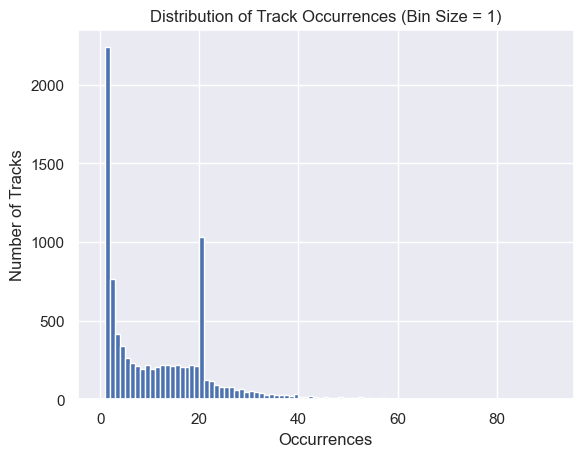

In [205]:
unique_tracks_count.hist(bins=range(0, unique_tracks_count.max() + 1, 1))
plt.xlabel("Occurrences")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Track Occurrences (Bin Size = 1)")
plt.show()

In [206]:
# getting the average number of weeks a song is featured in charts
average_feature_count = round(unique_tracks_count.mean())
print(f'In between the years 2000 and 2024, a song is on average featured {average_feature_count} times.')

In between the years 2000 and 2024, a song is on average featured 11 times.


#### What is the maximum number of times a aong has been featured on the charts?

In [207]:
# getting the top three most featured songs
unique_tracks_count.head(3)

track_id
3USxtqRwSYz57Ewm6wWRMp    91
4G8gkOterJn0Ywt6uhqbhp    85
7uKcScNXuO3MWw6LowBjW1    81
Name: count, dtype: int64

In [208]:
# getting number of songs that are featured more than the average 
unique_tracks_count[unique_tracks_count > 11].count()

3994

In [209]:
# getting keys for tracks
tracks.keys()

Index(['track_id', 'name', 'duration_ms', 'release_date', 'album_type',
       'explicit'],
      dtype='object')

In [210]:
# printing top three songs and how often they got featured in charts
for song_id in unique_tracks_count.head(3).index:
    song_name = tracks[tracks['track_id'] == song_id]['name'].values[0]
    feature_count = unique_tracks_count[song_id]
    print(f'"{song_name}" was featured {feature_count} times in the charts')
    print('-'*50)

"Heat Waves" was featured 91 times in the charts
--------------------------------------------------
"Radioactive" was featured 85 times in the charts
--------------------------------------------------
"1, 2 Step (feat. Missy Elliott)" was featured 81 times in the charts
--------------------------------------------------


#### Summary: Chart Structure

In this section, I analyzed the structure of the Billboard charts to understand the composition and frequency of songs appearing on the charts. These findings provide insights into the stability and recurring patterns within the Billboard charts, helping to understand the dynamics of song popularity over time.

What I found:

- 1286 charts out of 1294 weeks had less then 100 songs, indicating potential missing data. 
- On average a song is featured on the charts 11 times
- 3994 out of 9263 songs have been featured on the charts more then average
- The maximum number of times a single song has been featured on the charts is 91 times, highlights the enduring popularity of certain tracks over the years. 

### Audio features of popular songs

#### Aggregating audio features and plotting 

Since the audio features have different value ranges, they will be aggregated and visualized differently. Therefore, I will divide the audio features into two groups based on their value ranges and create reusable functions to aggregate and visualize each group.

Audio features, where the values follow the same range of 0 to 1: 

- danceability
- energy
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence

Track features, where each value has a different range: 

- key 
- loudness 
- tempo 
- time_signature 

In [211]:
# takes DataFrame as argument, performs aggregations and returns DataFrames for visualization (barchart)
def agg_audio_features(dataframe):
    
    # placeholder lists for DataFrames
    chart_data = []
    
    # aggregating values for barchart 
    features_dict = {
        # get value for audio features (value range from 0-1)
        'danceability': dataframe['danceability'].mean(),
        'energy': dataframe['energy'].mean(),
        'mode': dataframe['mode'].mean(),
        'speechiness': dataframe['speechiness'].mean(),
        'acousticness': dataframe['acousticness'].mean(),
        'instrumentalness': dataframe['instrumentalness'].mean(),
        'liveness': dataframe['liveness'].mean(),
        'valence': dataframe['valence'].mean(),
    }
    
    # create two columns for barchart
    chart_data = {
        'feature': list(features_dict.keys()),
        'value': list(features_dict.values())
    }

    # create DataFrames from dictionary 
    chart_df = pd.DataFrame(chart_data)
    
    return chart_df

In [212]:
# takes DataFrame as argument, performs aggregations and returns DataFrames for print
def agg_track_features (dataframe): 
     
   # find most frequent key in the dataset
    most_frequent_key = int(round(dataframe['key'].mode().iloc[0]))
        
    # keys are represented as integers (0-11) corresponding to musical notes
    keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
    key = keys[most_frequent_key]
        
    # aggregating values for numerical presentation 
    print_dict = {
        # get average beats per minute 
        'average_bpn': round(dataframe['tempo'].mean()),
        # get average beats per bar 
        'average_beats_per_bar': round(dataframe['time_signature'].mean()),
        # get percentage of songs in major and minor 
        'percentage_of_major': round((dataframe['mode'] == 1).mean() * 100),
        'percentage_of_minor': round((dataframe['mode'] == 0).mean() * 100),
        # get most frequent key 
        'most_frequent_key': key,
        # get average decibel 
        'average_decibels': round(dataframe['loudness'].mean())
    }
    
    # create two columns for numerical data
    print_data = {
        'metric': list(print_dict.keys()),
        'value': list(print_dict.values())
    }
    
    # create DataFrames from dictionary
    print_df = pd.DataFrame(print_data)
    
    return print_df

In [213]:
# takes DataFrames as arguments, returns barplot
def chart_audio_features(chart_df):
    plt.figure(figsize=(12, 6))

    # creating barplot
    sns.barplot(data=chart_df, 
            x='feature', 
            y='value')
    
    # set y axis limit
    plt.ylim(0, 1.0)
    
    # creating tick range
    ticks = [x/20 for x in range(0, 21)]
    plt.yticks(ticks)
    
    # adding labels and title
    plt.xlabel('Audio Features')
    plt.ylabel('Value')
    plt.title(f'Average Audio Features For Time period')
    

    plt.tight_layout()
    plt.show()

In [214]:
# takes two DataFrames as arguments, returns list of audio features
def print_audio_features(print_df):
        
    # get values from print_df data
    bpn = print_df.iloc[0,1]
    bppb = print_df.iloc[1,1]
    major = print_df.iloc[2,1]
    minor = print_df.iloc[3,1]
    key = print_df.iloc[4,1]
    db = print_df.iloc[5,1]
    
    # return list with numerical values
    return [
    f'Average beat per minute: {bpn}',
    f'Average beat per bar: {bppb}',
    f'Average decibel: {db}',
    f'{major}% of songs are in major',
    f'{minor}% of songs are in major',
    f'Most songs are in {key}'
    ]

In [215]:
# takes DataFrame as argument, returns barchart and list of audio features
def agg_chart_print (dataframe):
    # aggregating audio features for chart and print
    chart_df = agg_audio_features(dataframe)
    print_df = agg_track_features(dataframe)
    
    # visualizing audio features
    chart_audio_features(chart_df)
    
    # printing audio features
    return print_audio_features(print_df)

#### What was the average audio features for the past 24 years? 

In [216]:
# aggregating audio features to get the mean for each feature 
round(agg_audio_features(chart_with_audio_features),2)

,feature,value
0,danceability,0.64
1,energy,0.68
2,mode,0.67
3,speechiness,0.10
4,acousticness,0.17
5,instrumentalness,0.01
6,liveness,0.18
7,valence,0.52


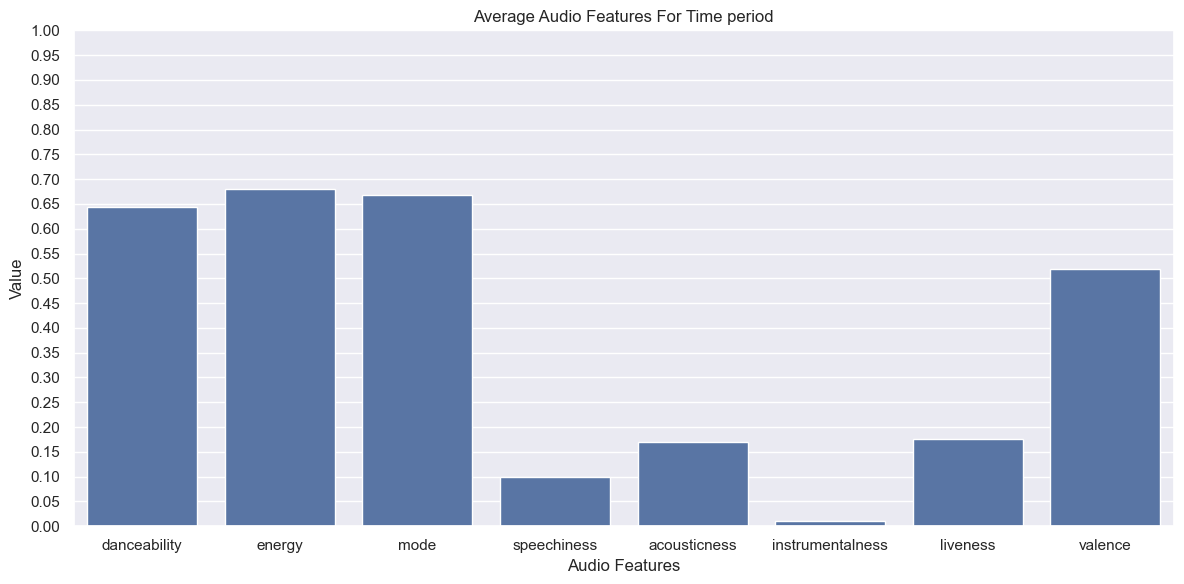

['Average beat per minute: 122',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '67% of songs are in major',
 '33% of songs are in major',
 'Most songs are in C#/Db']

In [217]:
# visualizing the mean of each audio/track feature for 2000 - 2024
agg_chart_print(chart_with_audio_features)

#### What was the average audio features for 2024? 

In [218]:
# takes DataFrame and year as arguments, returns DataFrame filtered on year 
def filter_on_year(dataframe, year): 
    filtered_dataframe = dataframe[dataframe['chart_week'].dt.year == year]
    return filtered_dataframe

In [219]:
# filtering on year 2024
last_year_df = filter_on_year(chart_with_audio_features, 2024)

In [220]:
# aggregating audio features to get the mean for each feature 
round(agg_audio_features(last_year_df),2)

,feature,value
0,danceability,0.66
1,energy,0.63
2,mode,0.66
3,speechiness,0.09
4,acousticness,0.21
5,instrumentalness,0.02
6,liveness,0.17
7,valence,0.47


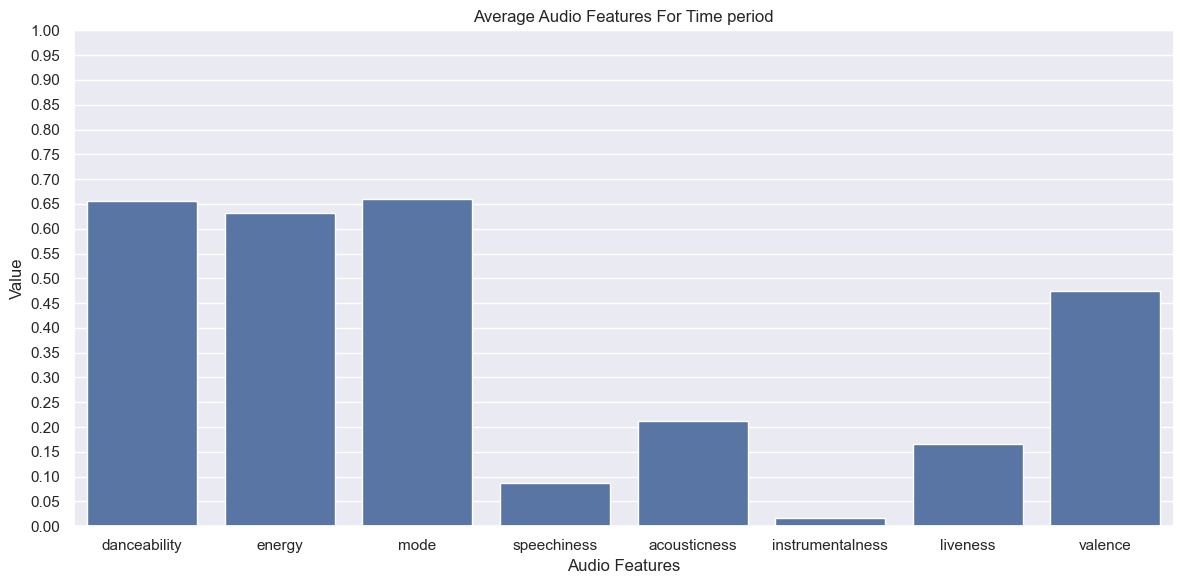

['Average beat per minute: 125',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '66% of songs are in major',
 '34% of songs are in major',
 'Most songs are in C#/Db']

In [221]:
# visualizing the mean of each track/audio feature for 2024
agg_chart_print(last_year_df)

#### What was the average audio features for 2000? 

In [222]:
# filtering on year 2020
first_year_df = filter_on_year(chart_with_audio_features, 2000)

In [223]:
# aggregating audio features to get the mean for each feature for 2000
round(agg_audio_features(first_year_df),2)

,feature,value
0,danceability,0.66
1,energy,0.70
2,mode,0.64
3,speechiness,0.07
4,acousticness,0.15
5,instrumentalness,0.00
6,liveness,0.16
7,valence,0.57


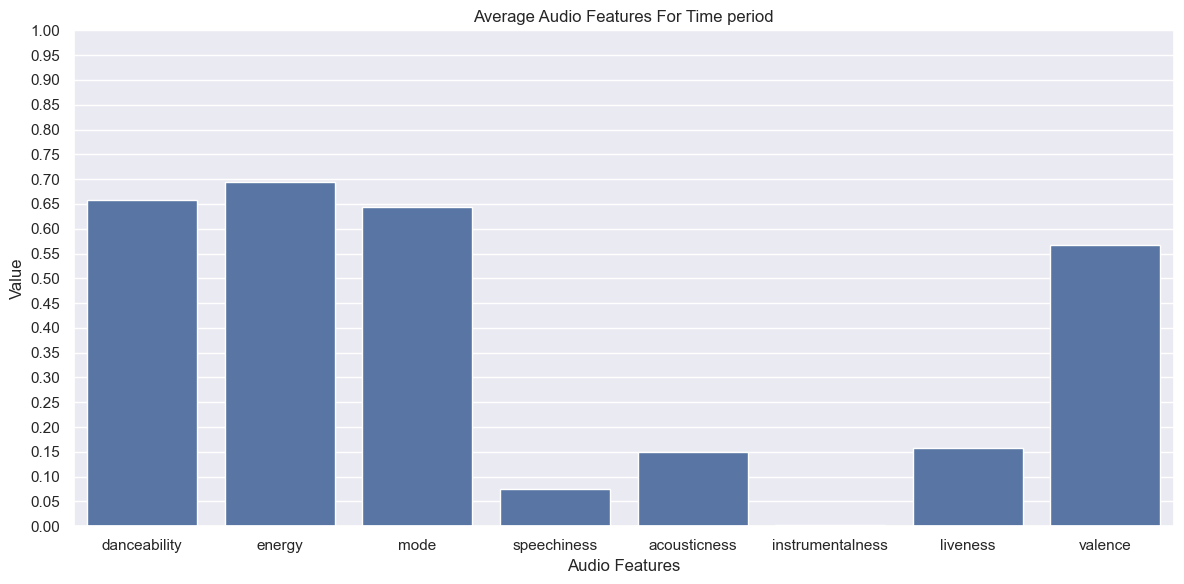

['Average beat per minute: 118',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '64% of songs are in major',
 '36% of songs are in major',
 'Most songs are in G']

In [224]:
# visualizing the mean of each audio/track feature for 2000
agg_chart_print(first_year_df)

#### Is there a significant difference in the audio features between the years 2000 and 2024?

In [225]:
# Comparing results from 2000 and 2024 side by side to identify potential significant changes.

In [226]:
# takes dataframe, year 1 and year 2 as arguments, returns comparison as barchart and DataFrame 
def agg_chart_print_compare (dataframe, year1, year2):
    
    # filtering on first year
    year1_df = filter_on_year(dataframe, year1)
    # filtering on second year
    year2_df = filter_on_year(dataframe, year2)
    
    # aggregating audio features for chart
    year1_chart_df = agg_audio_features(year1_df)
    year2_chart_df = agg_audio_features(year2_df)
    
    # adding year column to dataframe for filtering 
    year1_chart_df['filter'] = f'{year1}'
    year2_chart_df['filter'] = f'{year2}'
    
    # combining chart dataframe into one
    combined_chart_df = pd.concat([year1_chart_df, year2_chart_df])
    
    # aggregating audio features for print
    year1_print_df = agg_track_features(year1_df)
    year2_print_df = agg_track_features(year2_df)
    
    # renaming columns
    year1_print_df.rename(columns={'value': f'values for {year1}'}, inplace=True)
    year2_print_df.rename(columns={'value': f'values for {year2}'}, inplace=True)
    
    # selecting column with year 2 values and combining dataframe into 1
    year2_values = year2_print_df.iloc[:,1]
    combined_print_df = pd.concat([year1_print_df, year2_values], axis=1)
    
    # plotting first and last year side by side
    sns.catplot(
        data=combined_chart_df,
        x='feature',
        y='value',
        hue='filter',
        kind='bar',
        height=6,
        aspect=2
    )

    # set y axis limit
    plt.ylim(0, 1.0)
    
    # creating tick range
    ticks = [x/20 for x in range(0, 21)]
    plt.yticks(ticks)

    # adding labels and title
    plt.xlabel('Audio Features')
    plt.ylabel('Value')
    plt.title(f'Audio Features: {year1} VS {year2}')

    plt.show()
    
    return combined_print_df

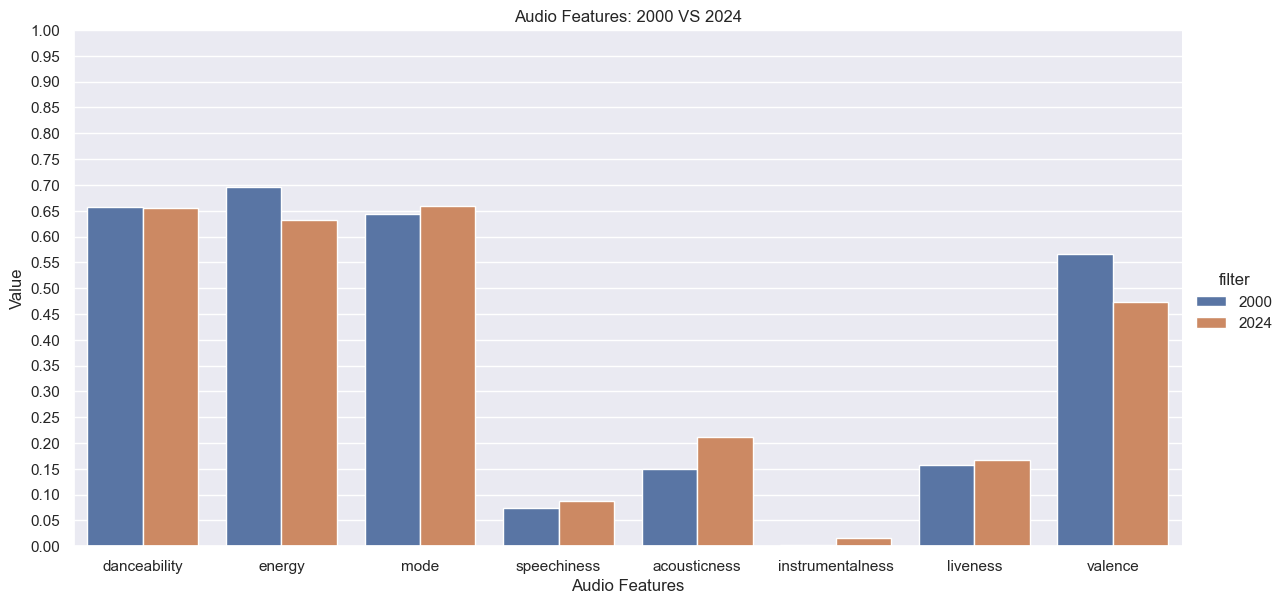

,metric,values for 2000,values for 2024
0,average_bpn,118,125
1,average_beats_per_bar,4,4
2,percentage_of_major,64,66
3,percentage_of_minor,36,34
4,most_frequent_key,G,C#/Db
5,average_decibels,-6,-6


In [227]:
# aggregating and comparing audio/track features for 2020 and 2024
combined_print_df = agg_chart_print_compare(chart_with_audio_features, 2000, 2024)
combined_print_df

#### Is there a difference in average audio features between the top 10% and the remaining listings?

In [228]:
# Comparing the top 10% of chart placements (1-10) with the remaining 90% of chart placements (11-100) to identify potential factors that result in higher placements.

In [229]:
# takes DataFrame, start date, date and returns DataFrame filtered on list_positions, and DataFrame excluding list_positions
def filter_on_list_position(df, start_list_position, end_list_position):
    # filter on list_position and add column 'filtered' with value 'filtered'
    filtered_df = df[df['list_position'].between(start_list_position, end_list_position)]
    filtered_df['filter'] = 'selected'
    
    # filter out list_position and add column 'remaining' with value 'remaining'
    remaining_df = df[~df['list_position'].between(start_list_position, end_list_position)]
    remaining_df['filter'] = 'remaining'
    
    return filtered_df, remaining_df

In [230]:
# filtering on list position 1-10 and 11-100
filtered_df, remaining_df = filter_on_list_position(chart_with_audio_features, 1, 10)

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_78359/1827107402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['filter'] = 'selected'
/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_78359/1827107402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_df['filter'] = 'remaining'


In [231]:
filtered_df.head()

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,filter
90252,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,Back At One,263666,1999-09-21,album,False,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0,selected
75187,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,I Wanna Love You Forever,263800,1999-11-16,album,False,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0,selected
22144,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,My Love Is Your Love,261573,1998-11-17,album,False,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0,selected
90534,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,I Knew I Loved You,250360,1999-11-09,album,False,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0,selected
99371,2000-01-01,6,7ffwRz8lZyDOE4Vj58Lo72,I Need to Know,227706,1999-09-28,album,False,0.813,0.949,3.0,-2.563,0.0,0.0336,0.4860,0.000010,0.1120,0.7920,115.061,4.0,selected


In [232]:
remaining_df.head()

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,filter
65125,2000-01-01,12,4rZB2G955dQMcjlb7e3VNB,24/7,274266,1999-10-12,album,False,0.696,0.627,4.0,-5.629,1.0,0.0334,0.06850,0.00000,0.0993,0.322,116.047,4.0,remaining
66936,2000-01-01,14,50MfV7a1pnOEcf2t9kobxW,Then The Morning Comes,182266,1999-06-08,album,False,0.729,0.882,5.0,-5.025,0.0,0.0283,0.02270,0.00000,0.0873,0.964,118.580,4.0,remaining
79064,2000-01-01,16,5yaCquc7koPqtgj7v0lwHX,Waiting for Tonight,246426,1999-06-01,album,False,0.695,0.945,10.0,-6.165,0.0,0.0418,0.00341,0.07270,0.1030,0.840,125.013,4.0,remaining
59232,2000-01-01,18,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962-01-01,album,False,0.320,0.210,6.0,-15.231,1.0,0.0345,0.92000,0.00008,0.1380,0.208,73.196,5.0,remaining
97618,2000-01-01,19,7K8Ew4j9qpkqEFlTdMdoqC,Dancin',248626,2000-01-01,album,False,0.798,0.703,10.0,-4.050,0.0,0.1350,0.11700,0.00000,0.1210,0.792,101.015,4.0,remaining


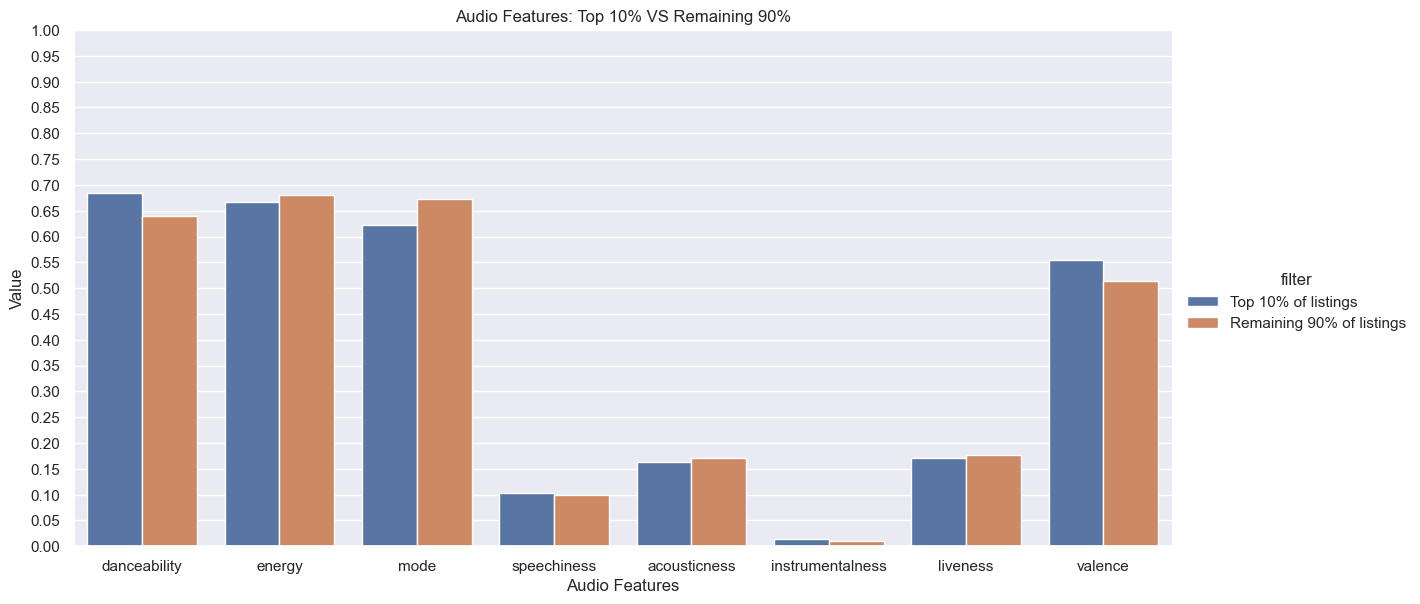

In [233]:
# aggregating audio features
top10_chart_df = agg_audio_features(filtered_df)
top90_chart_df = agg_audio_features(remaining_df)

# adding year column to each dataframe
top10_chart_df['filter'] = 'Top 10% of listings'
top90_chart_df['filter'] = 'Remaining 90% of listings'

# combining tow dataframe into one 
combined_chart_df = pd.concat([top10_chart_df, top90_chart_df])

# plotting top 10% and remaining 90% side by side
sns.catplot(
    data=combined_chart_df,
    x='feature',
    y='value',
    hue='filter',
    kind='bar',
    height=6,
    aspect=2
)

# set y axis limit
plt.ylim(0, 1.0)

# creating tick range
ticks = [x/20 for x in range(0, 21)]
plt.yticks(ticks)

 # adding labels and title
plt.xlabel('Audio Features')
plt.ylabel('Value')
plt.title('Audio Features: Top 10% VS Remaining 90%')

plt.show()

#### Summary: Audio features of popular songs

In this section, I analyzed the average audio features of hit songs over different time periods to understand the characteristics that define a hit song. These findings provide valuable insights into the defining characteristics of hit songs and how they have evolved over time.

What I found:

- Consistent Trends over the past 24 years, the average audio features show high danceability, energy, and mode, while being low in speechiness, acousticness, instrumentalness, and liveness.
- No major differences in the average audio features between the top 10% of songs and the remaining listings, as the top 10% follow the average audio features.

### Changes in audio features

#### Aggregating audio features by year

To identify long-term patterns and trends, I will group the dataset by years and then compare the mean audio and track values of each year.

In [132]:
# grouping chart by year and aggregating audio features
chart_aggregated_yearly = chart_with_audio_features.groupby(chart_with_audio_features['chart_week'].dt.year).agg(
    # get average value for audio features (value range from 0-1)
    dancingability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    mode=('mode', 'mean'),
    speechiness=('speechiness', 'mean'),
    acousticness=('acousticness', 'mean'),
    instrumentalness=('instrumentalness', 'mean'),
    liveness=('liveness', 'mean'),
    valence=('valence', 'mean'),
    # get average beats per minute and round
    avg_bpm=('tempo', lambda x: int(round(x.mean()))),
    # get average beats per bar 
    avg_beats_per_bar=('time_signature', 'mean'),
    # get percentage of songs in major/minor and round
    pct_songs_in_major=('mode', lambda x: round((x == 1).mean() * 100)),
    pct_songs_in_minor=('mode', lambda x: round((x == 0).mean() * 100)),
    # get average track key
    avg_song_key=('key', lambda x: int(x.mode().iloc[0]))
).reset_index()

In [133]:
# renamning chart_week and inspecting result
chart_aggregated_yearly = chart_aggregated_yearly.rename(columns={'chart_week': 'year'})
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.657518,0.695164,0.643027,0.074642,0.149192,0.002214,0.157797,0.566559,118,3.996430,64,36,7
1,2001,0.649078,0.687624,0.669860,0.094726,0.154312,0.010916,0.169081,0.575467,115,3.975682,67,33,1
2,2002,0.636658,0.706995,0.646579,0.104578,0.157194,0.009032,0.158467,0.566200,119,3.948135,65,35,2
3,2003,0.626827,0.696660,0.633713,0.104975,0.167704,0.006959,0.182146,0.550515,116,3.940256,63,37,1
4,2004,0.626176,0.705328,0.649569,0.112147,0.167227,0.006615,0.182901,0.562070,121,3.937440,65,35,2


In [134]:
# convert numeric percentages to string for clarity
def numeric_to_percentage(column):
    return f"{column}%"

In [135]:
# each integer in avg_song_key refers to a musical note
# convert numerical value to music notes
def numeric_to_key(column):
    key_map = {
        "0": "C", "1": "C#/Db", "2": "D", "3": "D#/Eb", "4": "E",
        "5": "F", "6": "F#/Gb", "7": "G", "8": "G#/Ab", "9": "A",
        "10": "A#/Bb", "11": "B"
    }
    return key_map.get(column, column)

In [136]:
# replacing numerical values with musical notes and inspecting result 
chart_aggregated_yearly['avg_song_key'] = chart_aggregated_yearly['avg_song_key'].astype(str).apply(numeric_to_key)
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.657518,0.695164,0.643027,0.074642,0.149192,0.002214,0.157797,0.566559,118,3.996430,64,36,G
1,2001,0.649078,0.687624,0.669860,0.094726,0.154312,0.010916,0.169081,0.575467,115,3.975682,67,33,C#/Db
2,2002,0.636658,0.706995,0.646579,0.104578,0.157194,0.009032,0.158467,0.566200,119,3.948135,65,35,D
3,2003,0.626827,0.696660,0.633713,0.104975,0.167704,0.006959,0.182146,0.550515,116,3.940256,63,37,C#/Db
4,2004,0.626176,0.705328,0.649569,0.112147,0.167227,0.006615,0.182901,0.562070,121,3.937440,65,35,D


In [137]:
# replacing numerical values with string and inspecting result 
chart_aggregated_yearly['pct_songs_in_major'] = chart_aggregated_yearly['pct_songs_in_major'].astype(str).apply(numeric_to_percentage)
chart_aggregated_yearly['pct_songs_in_minor'] = chart_aggregated_yearly['pct_songs_in_minor'].astype(str).apply(numeric_to_percentage)
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.657518,0.695164,0.643027,0.074642,0.149192,0.002214,0.157797,0.566559,118,3.996430,64%,36%,G
1,2001,0.649078,0.687624,0.669860,0.094726,0.154312,0.010916,0.169081,0.575467,115,3.975682,67%,33%,C#/Db
2,2002,0.636658,0.706995,0.646579,0.104578,0.157194,0.009032,0.158467,0.566200,119,3.948135,65%,35%,D
3,2003,0.626827,0.696660,0.633713,0.104975,0.167704,0.006959,0.182146,0.550515,116,3.940256,63%,37%,C#/Db
4,2004,0.626176,0.705328,0.649569,0.112147,0.167227,0.006615,0.182901,0.562070,121,3.937440,65%,35%,D


#### Are there yearly trends in the average audio features?

In [138]:
# getting keys
chart_aggregated_yearly.keys()

Index(['year', 'dancingability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'avg_bpm',
       'avg_beats_per_bar', 'pct_songs_in_major', 'pct_songs_in_minor',
       'avg_song_key'],
      dtype='object')

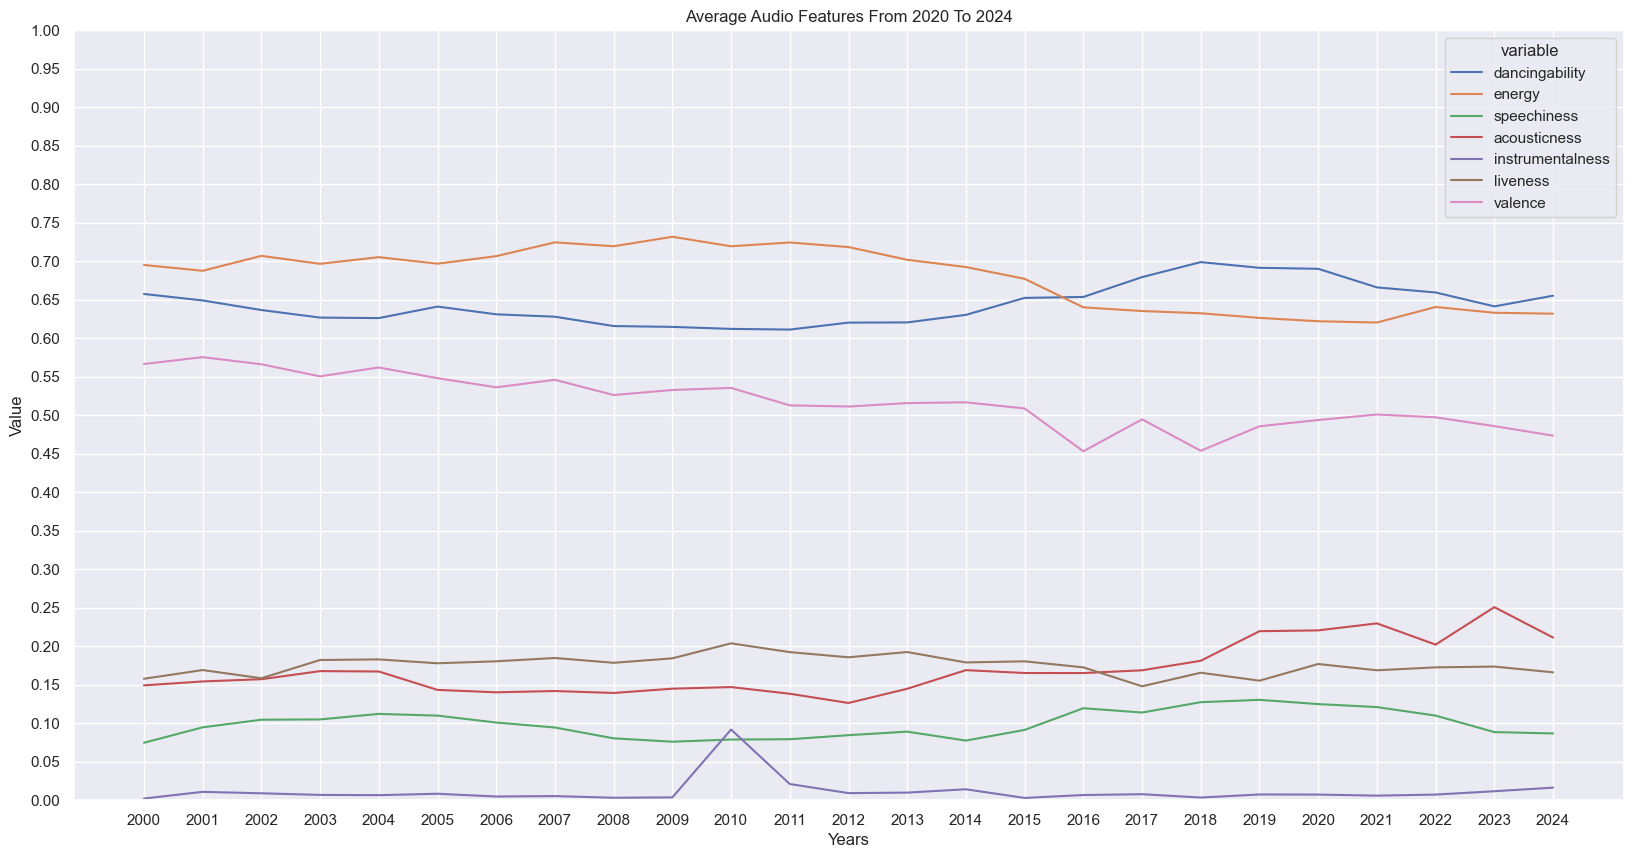

In [139]:
# visualize audio features year over year from 2020 to 2024
# listing columns to be plotted
columns_to_plot = ['dancingability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# transforming DataFrame for easier plotting and selecting columns to plot
melted_df = chart_aggregated_yearly.melt(id_vars=['year'], value_vars=columns_to_plot, var_name='variable', value_name='value')

# plotting the data
plt.figure(figsize=(20, 10))
sns.lineplot(data=melted_df, x='year', y='value', hue='variable')

# setting ticks for each year
plt.xticks(ticks=melted_df['year'].unique())

# setting y-axis scale from 0.0 to 1.0
plt.ylim(0.0, 1.0)

# creating tick range
ticks = [x/20 for x in range(0, 21)]
plt.yticks(ticks)

# adding labels and title
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Average Audio Features From 2020 To 2024')

plt.show()

Summary of graph: 
- Dancingability and Energy: Show a fairly consistent trend over the years, indicating that the danceability and energy levels of hit songs have remained relatively stable.
- Speechiness: Shows a fairly constant trend over the years, indicating that the amount of spoken words in hit songs has not varied significantly.
- Acousticness: Shows a positive trend, suggesting a move away from electronically produced music.
- Instrumentalness: Shows a spike during 2010, indicating a year where songs without vocals were more prevalent.
- Liveness: shows minor fluctuations, suggesting some variation in the perceived Shows minor fluctuations, suggesting some variation in the perceived live performance quality of hit songs.
- Valence: Shows a slight negative trend, indicating that the emotional tone of hit songs is shifting towards emotions such as sadness, depression, and anger.

#### Aggregating audio features by month

In [140]:
# grouping chart by month and aggregating audio features
chart_aggregated_monthly = chart_with_audio_features.groupby(chart_with_audio_features['chart_week'].dt.month).agg(
    # get average value for audio features (value range from 0-1)
    dancingability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    mode=('mode', 'mean'),
    speechiness=('speechiness', 'mean'),
    acousticness=('acousticness', 'mean'),
    instrumentalness=('instrumentalness', 'mean'),
    liveness=('liveness', 'mean'),
    valence=('valence', 'mean'),
    # get average beats per minute and round
    avg_bpm=('tempo', lambda x: int(round(x.mean()))),
    # get average beats per bar 
    avg_beats_per_bar=('time_signature', 'mean'),
    # get percentage of songs in major/minor and round
    pct_songs_in_major=('mode', lambda x: round((x == 1).mean() * 100)),
    pct_songs_in_minor=('mode', lambda x: round((x == 0).mean() * 100)),
    # get average track key
    avg_song_key=('key', lambda x: int(round(x.mode().iloc[0])))
).reset_index()

In [141]:
# renaming 'chart_week' to 'month' and inspecting result
chart_aggregated_monthly = chart_aggregated_monthly.rename(columns={'chart_week': 'month'})
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,1,0.637549,0.675937,0.667550,0.096996,0.176939,0.012871,0.177088,0.517345,122,3.978249,67,33,1
1,2,0.644541,0.676182,0.669560,0.098003,0.172469,0.011378,0.173873,0.510931,122,3.979462,67,33,1
2,3,0.643738,0.676286,0.669870,0.098850,0.174744,0.010417,0.173018,0.509303,121,3.970608,67,33,1
3,4,0.643698,0.675256,0.663375,0.100128,0.172250,0.010919,0.175407,0.508978,122,3.962572,66,34,1
4,5,0.643942,0.679847,0.661812,0.102109,0.174615,0.012491,0.176298,0.514825,122,3.957454,66,34,1


In [142]:
# convert numerical value to month name
def numeric_to_month(column):
    month_map = {
        "1": "jan", "2": "feb", "3": "mar", "4": "apr",
        "5": "maj", "6": "jun", "7": "jul", "8": "aug",
        "9": "sep", "10": "okt", "11": "nov", "12": "dec"
    }
    return month_map.get(column, column)

In [143]:
# replacing numerical values with month names and inspecting result 
chart_aggregated_monthly['month'] = chart_aggregated_monthly['month'].astype(str).apply(numeric_to_month)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.637549,0.675937,0.667550,0.096996,0.176939,0.012871,0.177088,0.517345,122,3.978249,67,33,1
1,feb,0.644541,0.676182,0.669560,0.098003,0.172469,0.011378,0.173873,0.510931,122,3.979462,67,33,1
2,mar,0.643738,0.676286,0.669870,0.098850,0.174744,0.010417,0.173018,0.509303,121,3.970608,67,33,1
3,apr,0.643698,0.675256,0.663375,0.100128,0.172250,0.010919,0.175407,0.508978,122,3.962572,66,34,1
4,maj,0.643942,0.679847,0.661812,0.102109,0.174615,0.012491,0.176298,0.514825,122,3.957454,66,34,1


In [144]:
# replacing numerical values with musical notes and inspecting result 
chart_aggregated_monthly['avg_song_key'] = chart_aggregated_monthly['avg_song_key'].astype(str).apply(numeric_to_key)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.637549,0.675937,0.667550,0.096996,0.176939,0.012871,0.177088,0.517345,122,3.978249,67,33,C#/Db
1,feb,0.644541,0.676182,0.669560,0.098003,0.172469,0.011378,0.173873,0.510931,122,3.979462,67,33,C#/Db
2,mar,0.643738,0.676286,0.669870,0.098850,0.174744,0.010417,0.173018,0.509303,121,3.970608,67,33,C#/Db
3,apr,0.643698,0.675256,0.663375,0.100128,0.172250,0.010919,0.175407,0.508978,122,3.962572,66,34,C#/Db
4,maj,0.643942,0.679847,0.661812,0.102109,0.174615,0.012491,0.176298,0.514825,122,3.957454,66,34,C#/Db


In [145]:
# replacing numerical values with string and inspecting result 
chart_aggregated_monthly['pct_songs_in_major'] = chart_aggregated_monthly['pct_songs_in_major'].astype(str).apply(numeric_to_percentage)
chart_aggregated_monthly['pct_songs_in_minor'] = chart_aggregated_monthly['pct_songs_in_minor'].astype(str).apply(numeric_to_percentage)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.637549,0.675937,0.667550,0.096996,0.176939,0.012871,0.177088,0.517345,122,3.978249,67%,33%,C#/Db
1,feb,0.644541,0.676182,0.669560,0.098003,0.172469,0.011378,0.173873,0.510931,122,3.979462,67%,33%,C#/Db
2,mar,0.643738,0.676286,0.669870,0.098850,0.174744,0.010417,0.173018,0.509303,121,3.970608,67%,33%,C#/Db
3,apr,0.643698,0.675256,0.663375,0.100128,0.172250,0.010919,0.175407,0.508978,122,3.962572,66%,34%,C#/Db
4,maj,0.643942,0.679847,0.661812,0.102109,0.174615,0.012491,0.176298,0.514825,122,3.957454,66%,34%,C#/Db


#### Are there seasonal trends in the average audio features?

In [146]:
# getting keys 
chart_aggregated_monthly.keys()

Index(['month', 'dancingability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'avg_bpm',
       'avg_beats_per_bar', 'pct_songs_in_major', 'pct_songs_in_minor',
       'avg_song_key'],
      dtype='object')

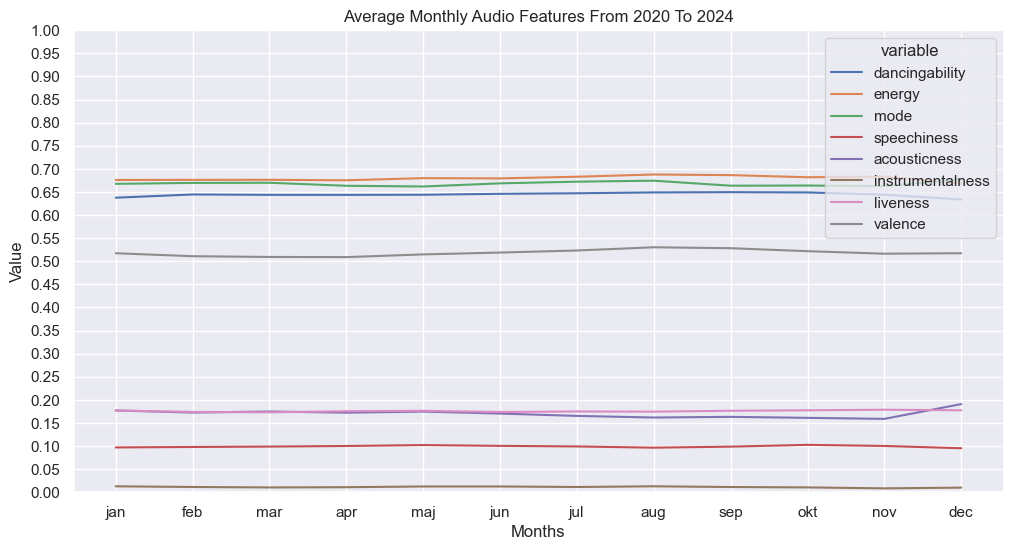

In [147]:
# visualizing monthly trends between 2020 and 2024

# listing columns to be plotted
columns_to_plot = ['dancingability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# transforming DataFrame for easier plotting and selecting columns to plot
melted_df = chart_aggregated_monthly.melt(id_vars=['month'], value_vars=columns_to_plot, var_name='variable', value_name='value')

# plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='month', y='value', hue='variable')

# setting ticks for each month
months_order = ['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec']
plt.xticks(ticks=months_order, labels=months_order)

# setting y-axis scale from 0.0 to 1.0
plt.ylim(0.0, 1.0)

# creating tick range
ticks = [x/20 for x in range(0, 21)]
plt.yticks(ticks)

# adding labels and title
plt.xlabel('Months')
plt.ylabel('Value')
plt.title('Average Monthly Audio Features From 2020 To 2024')

plt.show()

Summary of graph: 
- Increase in acousticnes in december, indicating a preference in acustic bias music during during christmas 
- sligh increase in valence from may to okt, indicating a slight change in the emotial tone of songs during these months 
- slight downword trend in mode from august to december, indicating 

#### Summary: Changes in audio features

In this section, I analyzed the changes in average audio features of hit songs over the past 25 years, highlighting the evolving nature of popular music and providing insights into the changing preferences of listeners. What I found was an overall stability of audio features in hit songs over the years, with minor variations in others.

### Track features of popular 

#### Joining charts with artists 

In [148]:
# inspecting charts_with_tracks
charts_with_tracks

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit
0,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
1,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
2,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
3,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
4,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False
...,...,...,...,...,...,...,...,...
104150,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104151,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104152,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False
104153,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False


In [149]:
# inspecting tracks_artists_mapping
tracks_artists_mapping

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
...,...,...
15043,7z5WFjZAIYejWy0NI5lv4T,0vzSAyinyA619ZbrOaAi04
15044,7zICaxnDB9ZprDSiFpvbbW,1mtUwv8L4nhMRfbP2pa36V
15045,7zICaxnDB9ZprDSiFpvbbW,0YHI5hydPPth6J5UOzdLDX
15046,7zICaxnDB9ZprDSiFpvbbW,5ztSiJBrCxd4Q0s0yc3tAV


In [150]:
# adding artist id to chart by inner joining chart_positions with artists on 'track_id'
chart_with_mapping = pd.merge(charts_with_tracks, tracks_artists_mapping, on='track_id', how= 'inner')
chart_with_mapping

,chart_week,list_position,track_id,name,duration_ms,release_date,album_type,explicit,artist_id
0,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT
1,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT
2,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT
3,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT
4,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT
...,...,...,...,...,...,...,...,...,...
140510,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a
140511,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a
140512,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a
140513,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a


In [151]:
# adding artist information by inner joining chart_with_mapping with artists on 'artist_id'
chart_with_metadata = pd.merge(chart_with_mapping, artists, on='artist_id', how= 'inner')
chart_with_metadata

,chart_week,list_position,track_id,name_x,duration_ms,release_date,album_type,explicit,artist_id,name_y,popularity,followers
0,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
1,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
2,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
3,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
4,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
...,...,...,...,...,...,...,...,...,...,...,...,...
140510,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a,Montgomery Gentry,58,1475847
140511,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a,Montgomery Gentry,58,1475847
140512,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a,Montgomery Gentry,58,1475847
140513,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,If You Ever Stop Loving Me,202760,2004-05-18,album,False,3bGXaFVQLASmDMdjjeJr8a,Montgomery Gentry,58,1475847


In [152]:
# dropping unnecessary columns and inspecting result
chart_with_metadata.drop(['track_id', 'artist_id', 'name_x', 'release_date', 'name_y', ], axis=1, inplace=True)
chart_with_metadata

,chart_week,list_position,duration_ms,album_type,explicit,popularity,followers
0,2003-07-19,60,233266,album,False,68,2692470
1,2003-07-26,60,233266,album,False,68,2692470
2,2003-08-02,64,233266,album,False,68,2692470
3,2003-07-12,66,233266,album,False,68,2692470
4,2003-08-09,66,233266,album,False,68,2692470
...,...,...,...,...,...,...,...
140510,2004-07-31,67,202760,album,False,58,1475847
140511,2004-08-07,80,202760,album,False,58,1475847
140512,2004-08-14,81,202760,album,False,58,1475847
140513,2004-08-21,82,202760,album,False,58,1475847


#### Is there a correlation between album type and chart placements?

In [153]:
# counting number of singles, albums and compilations
chart_with_metadata['album_type'].value_counts()

album_type
album          113971
single          23961
compilation      2583
Name: count, dtype: int64

In [154]:
# getting percentage of singles, albums and compilations
chart_with_metadata['album_type'].value_counts(normalize=True) * 100

album_type
album          81.109490
single         17.052272
compilation     1.838238
Name: proportion, dtype: float64

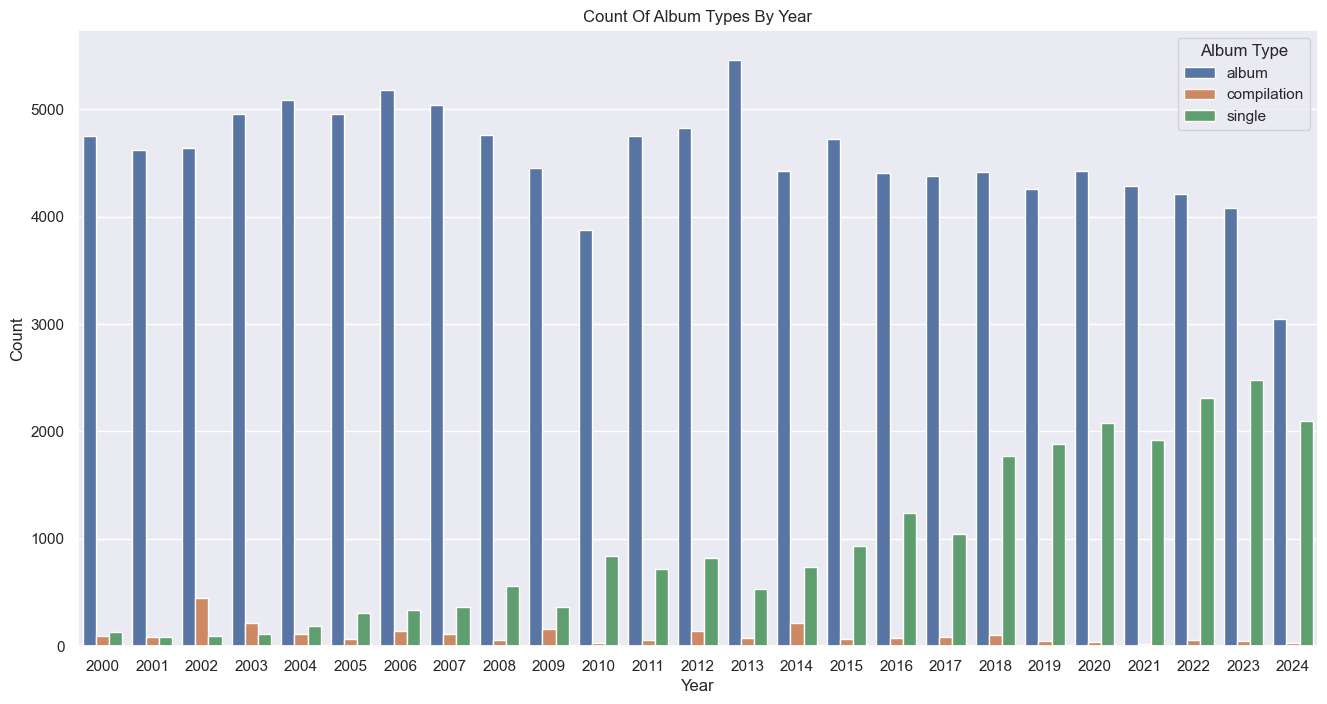

In [155]:
# extracting year from chart_wee
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# grouping by year and album_type and counting occurrences
grouped_data = chart_with_metadata.groupby(['year', 'album_type']).size().reset_index(name='count')

# plotting the data
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_data, x='year', y='count', hue='album_type')
plt.title('Count Of Album Types By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Album Type')
plt.show()

Summary of graph:

- Compilation Albums: There is a negative trend indicating that the number of compilation albums featured on the charts is decreasing. Compilation albums also have the lowest count compared to other album types.
- Albums: There is a negative trend indicating that the number of album songs featured on the charts is decreasing. However, album songs are still the most frequently featured song type on the charts.
- Singles: There is a positive trend indicating that the number of single songs featured on the charts is increasing in popularity, and as of 2024, singles are almost matching albums in count.

Average chart placement for single: 52
Average chart placement for compilation songs: 54
Average chart placement for album songs: 50


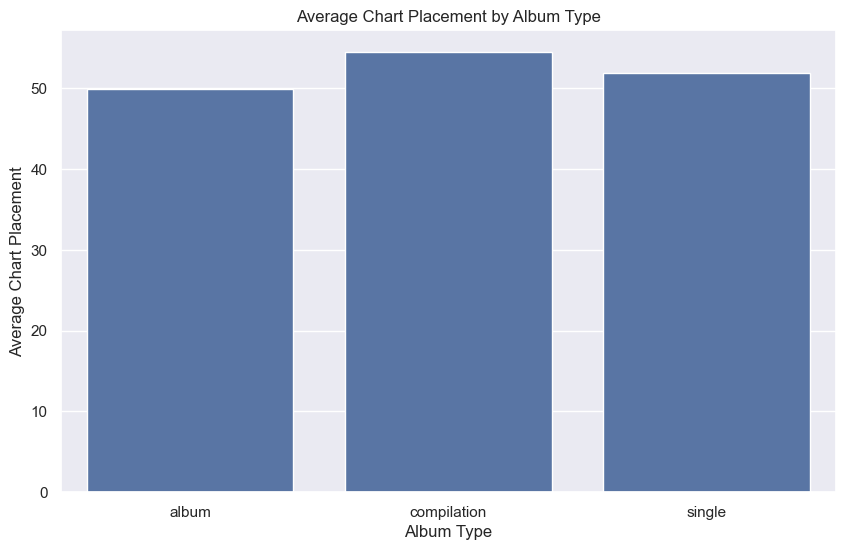

In [156]:
# calculate the average chart placement for each album type
avg_chart_placement_by_album_type = chart_with_metadata.groupby('album_type')['list_position'].mean().reset_index()

single = round(avg_chart_placement_by_album_type.iloc[2,1])
compilation = round(avg_chart_placement_by_album_type.iloc[1,1])
album = round(avg_chart_placement_by_album_type.iloc[0,1])

# printing values
print(f"Average chart placement for single: {single}")
print(f"Average chart placement for compilation songs: {compilation}")
print(f"Average chart placement for album songs: {album}")

# plotting the average chart placement by album type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_chart_placement_by_album_type, x='album_type', y='list_position')
plt.title('Average Chart Placement by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Average Chart Placement')
plt.show()

#### Is there a correlation between song explicitness and chart placements?

In [157]:
# counting number of explicit and non-explicit songs
explicit = chart_with_metadata['explicit'].value_counts()
explicit

explicit
False    86652
True     53863
Name: count, dtype: Int64

In [158]:
# calculating percentage of explicit songs
chart_with_metadata['explicit'].value_counts(normalize=True) * 100

explicit
False    61.667438
True     38.332562
Name: proportion, dtype: Float64

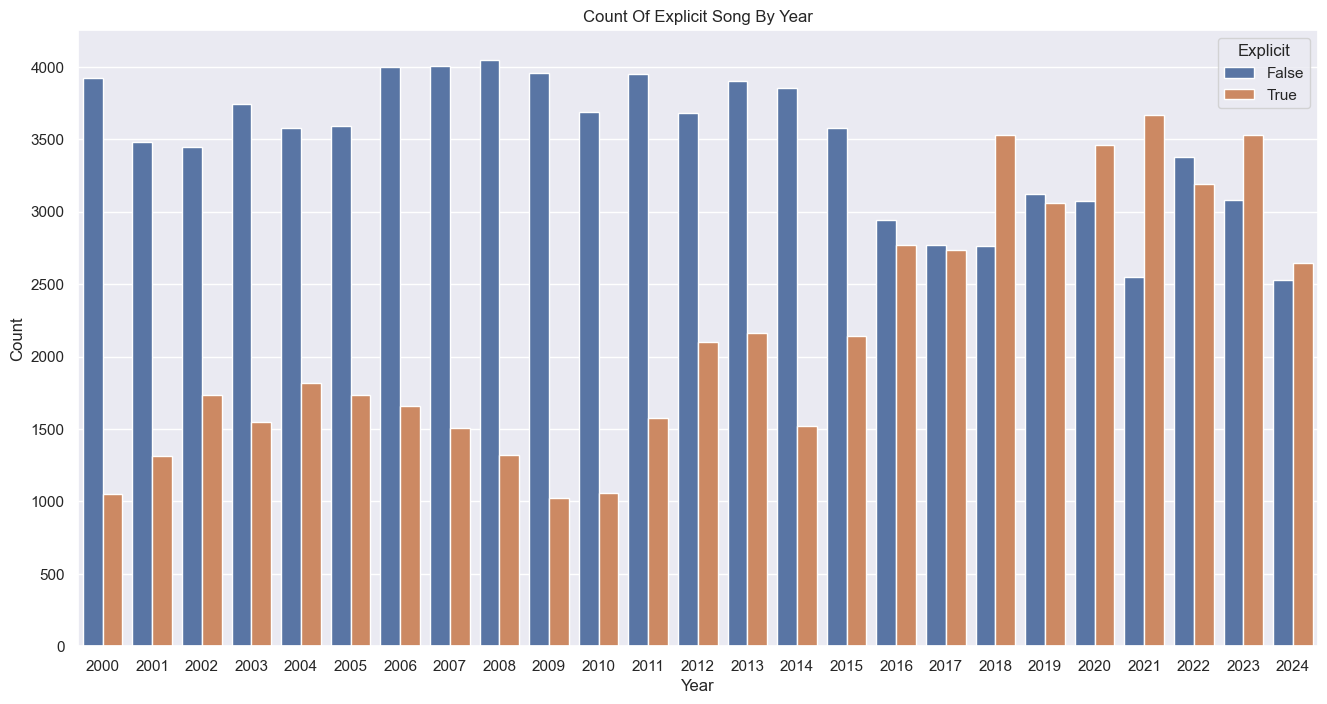

In [159]:
# extracting year from chart_week
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# grouping by year and explicit and counting occurrences
grouped_data = chart_with_metadata.groupby(['year', 'explicit']).size().reset_index(name='count')

# plotting the data
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_data, x='year', y='count', hue='explicit')
plt.title('Count Of Explicit Song By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Explicit')
plt.show()

Summary of graph:

- Not Explicit: There is an overall negative trend indicating that the number of non-explicit songs on the charts is decreasing, however, the ratio of non-explicit to explicit songs has been almost equal since 2016
- Explicit: There is an overall positive trend indicating that the number of explicit songs featured on the charts has increased, however, the ratio of non-explicit to explicit songs has been almost equal since 2016

Average chart placement for explicit songs: 51
Average chart placement for non-explicit songs: 50


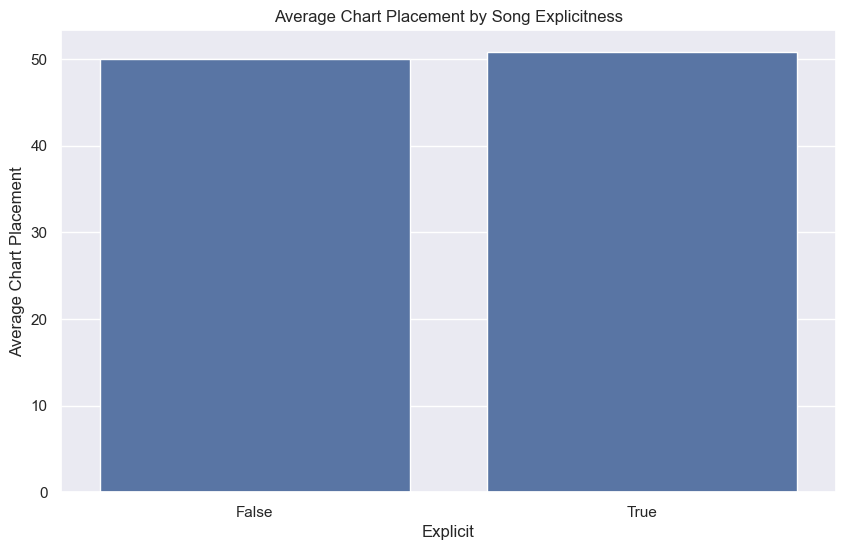

In [160]:
# calculate the average chart placement for explicit and non-explicit songs
avg_chart_placement_by_explicitness = chart_with_metadata.groupby('explicit')['list_position'].mean().reset_index()

# getting explicit and not explicit values for print
not_explicit = round(avg_chart_placement_by_explicitness.iloc[0,1])
explicit = round(avg_chart_placement_by_explicitness.iloc[1,1])

# printing values
print(f"Average chart placement for explicit songs: {explicit}")
print(f"Average chart placement for non-explicit songs: {not_explicit}")

# plotting the average chart placement by explicitness
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_chart_placement_by_explicitness, x='explicit', y='list_position')
plt.title('Average Chart Placement by Song Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Chart Placement')
plt.show()

#### Is there a correlation between song duration and chart placement?

In [161]:
# checking the average, min and max values for song duration
chart_with_metadata['duration_ms'].describe()

count        140515.0
mean     225523.61829
std      44820.355557
min           37013.0
25%          197866.0
50%          222093.0
75%          248586.0
max         1037906.0
Name: duration_ms, dtype: Float64

In [162]:
# calculating the average song duration in minutes
avg_duration_minutes = (chart_with_metadata['duration_ms'] / 60000).mean()
round(avg_duration_minutes, 2)

3.76

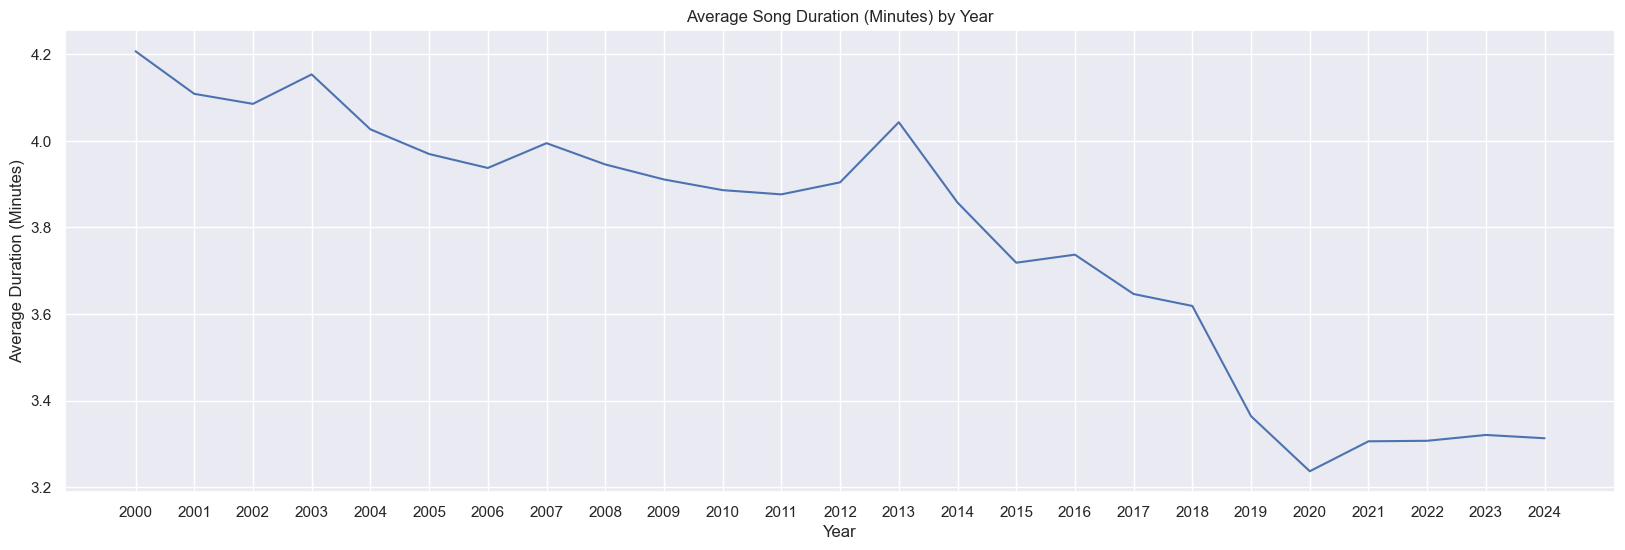

In [163]:
# extracting year form chart_week
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# converting song duration from milliseconds to minutes
chart_with_metadata['duration_minutes'] = chart_with_metadata['duration_ms'] / 60000

# grouping by year and calculate the average duration
average_duration_per_year = chart_with_metadata.groupby('year')['duration_minutes'].mean().reset_index()

# plotting the data
plt.figure(figsize=(20, 6))
sns.lineplot(data=average_duration_per_year, x='year', y='duration_minutes')
plt.title('Average Song Duration (Minutes) by Year')
plt.xlabel('Year')
plt.xticks(ticks=average_duration_per_year['year'])
plt.ylabel('Average Duration (Minutes)')
plt.show()

Summary of graph: 
- Song duration: There is a negative trend indicating that shorter songs are rising in popularity. Song duration has been relatively stable around 3.3 minutes from 2021 onwards.

#### Summary: Track features of popular songs

In this section, I analyzed the changes in album types, explicit content, and song duration among hit songs over the past 25 years, highlighting the evolving nature of popular music and providing insights into the changing preferences of listeners. 

What I found:

- Consistent low amount of compilation songs across the years and a decrease in albums song (though they remain the most frequently charted), while singles have risen steadily. 
- Song duration shows a shift toward shorter tracks, stabilizing around 3.3 minutes from 2021 onward.
- Explicit songs have increased in popularity since 2026, indicating a shift in lister preference for more explicit content.

### Correlation between artists and chart placements

#### Is there a correlation between Spotifys popularity score and their chart placements?

Correlation between Spotify Popularity Score and Chart Placements: -0.12772519355847758


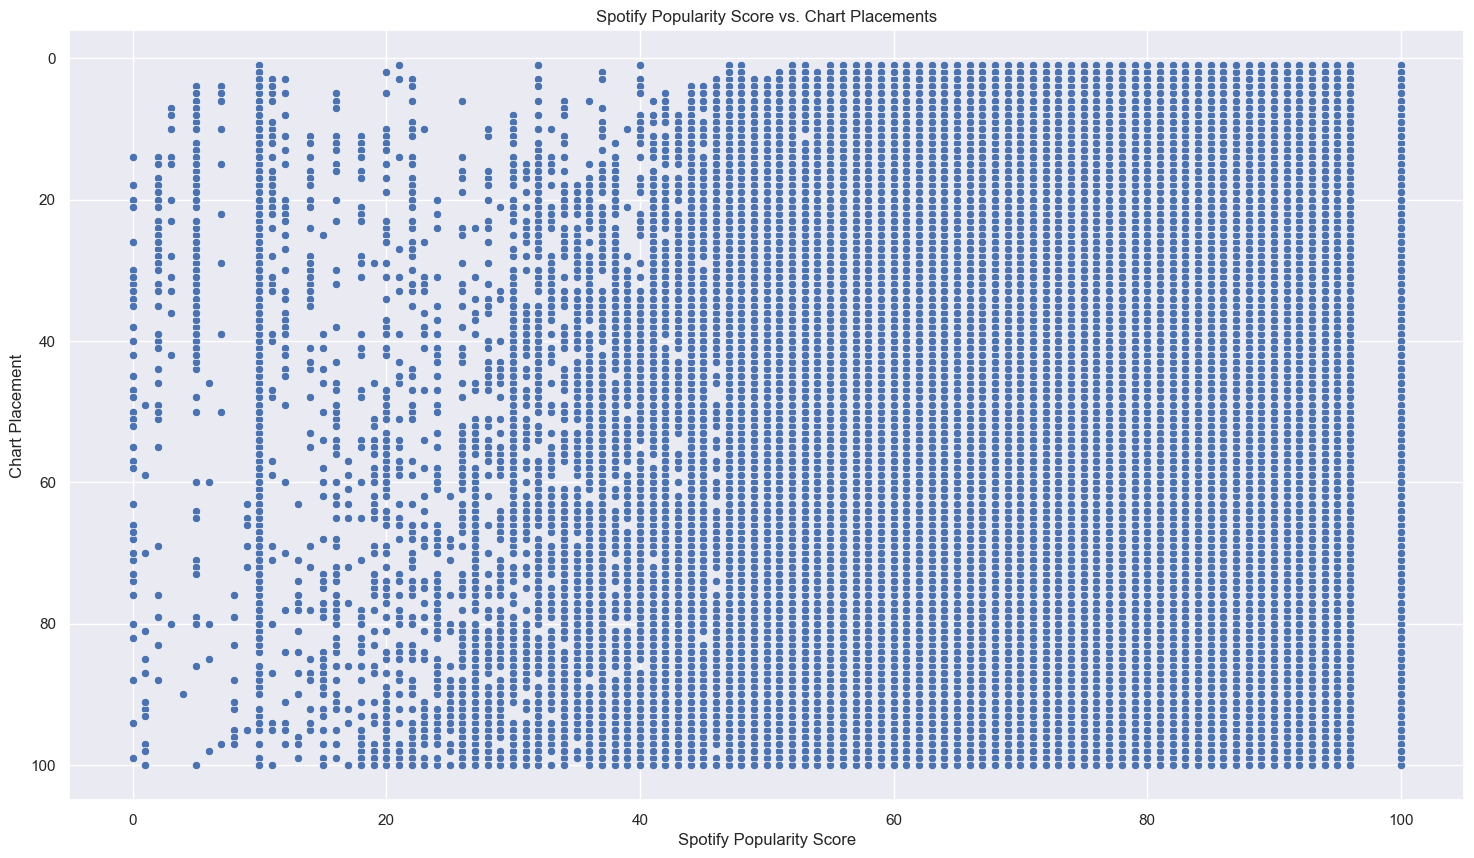

In [164]:
# calculate the correlation between Spotify popularity score and chart placements
correlation_popularity = chart_with_metadata['popularity'].corr(chart_with_metadata['list_position'])

print(f"Correlation between Spotify Popularity Score and Chart Placements: {correlation_popularity}")

# Plotting the relationship
plt.figure(figsize=(18, 10))
sns.scatterplot(data=chart_with_metadata, x='popularity', y='list_position')
plt.title('Spotify Popularity Score vs. Chart Placements')
plt.xlabel('Spotify Popularity Score')
plt.ylabel('Chart Placement')

# invert x-axis to show 1 as the best score
plt.gca().invert_yaxis()

plt.show()

In [165]:
# inspecting max and min values for popularity 
chart_with_metadata['popularity'].describe()

count     140515.0
mean     73.257424
std      15.424105
min            0.0
25%           65.0
50%           75.0
75%           85.0
max          100.0
Name: popularity, dtype: Float64

#### Is there a correlation between artists Spotify followers and their chart placements?

In [166]:
# inspecting max and min values for followers 
chart_with_metadata['followers'].describe()

count           140515.0
mean     14923041.827727
std      25026428.981274
min                  5.0
25%            1303150.0
50%            4763762.0
75%           15086186.0
max          123544806.0
Name: followers, dtype: Float64

Correlation between Spotify Followers and Chart Placements: -0.12307256957593168


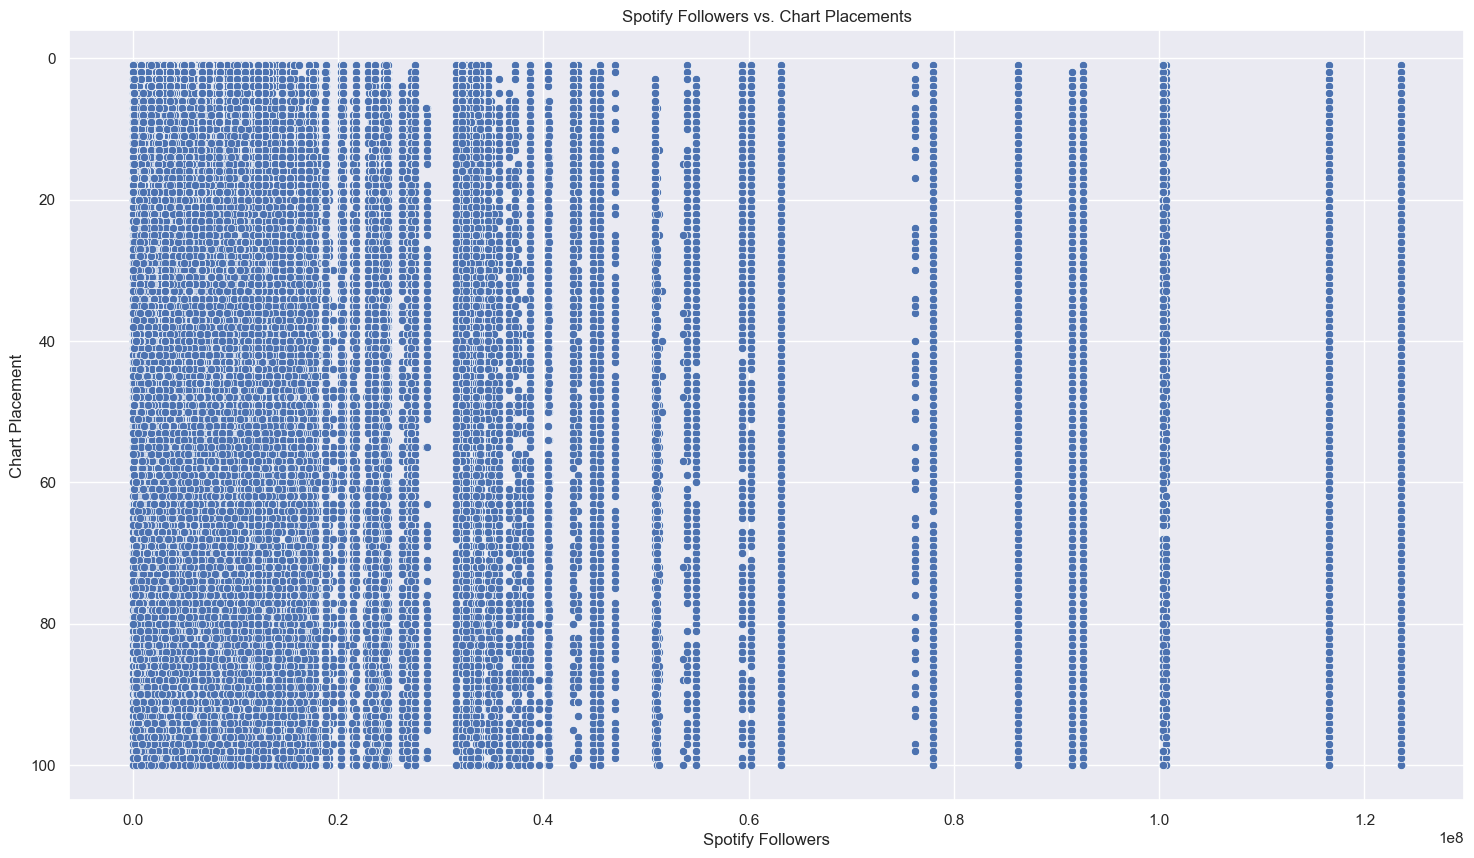

In [167]:
# calculate the correlation between Spotify followers and chart placements
correlation_followers = chart_with_metadata['followers'].corr(chart_with_metadata['list_position'])

print(f"Correlation between Spotify Followers and Chart Placements: {correlation_followers}")

# plotting the relationship
plt.figure(figsize=(18, 10))
sns.scatterplot(data=chart_with_metadata, x='followers', y='list_position')
plt.title('Spotify Followers vs. Chart Placements')
plt.xlabel('Spotify Followers')
plt.ylabel('Chart Placement')

# invert x-axis to show 1 as the best score
plt.gca().invert_yaxis()

plt.show()

#### Correlation between Spotify popularity score, followers count and chart positions

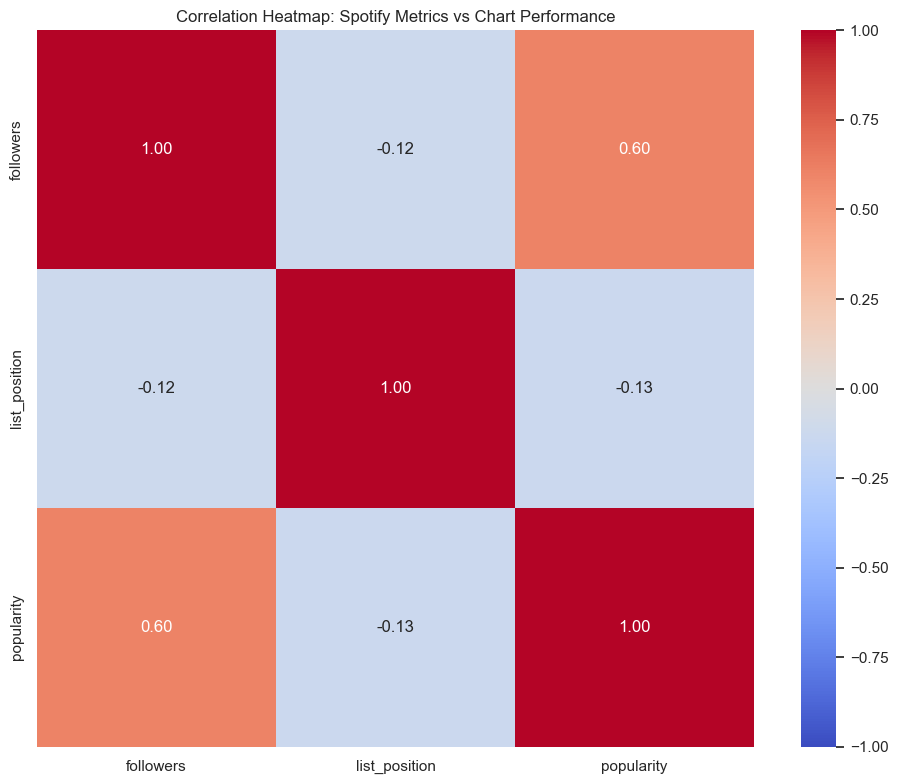

In [168]:
# calculating correlation matrix for 'followers', 'list_position', 'popularity'
correlation_matrix = chart_with_metadata[['followers', 'list_position', 'popularity']].corr()

# creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='coolwarm', 
            vmin=-1, vmax=1,  #
            center=0,  
            square=True,  
            fmt='.2f') 

plt.title('Correlation Heatmap: Spotify Metrics vs Chart Performance')
plt.tight_layout()
plt.show()

#### Summary: Correlation between artists and chart placements

In this section, I analyzed the relationship between various artist metrics and their chart placements to understand what factors might contribute to a song's success on the charts. 

What I found: 

- Spotify followers and chart placements: A correlation of -0.12 suggests a weak negative correlation, indicating that more followers are slightly associated with better chart positions, but the relationship is weak.
- Spotify popularity score and chart placements: A correlation of -0.12 indicates a weak negative correlation, implying that higher popularity scores are minimally associated with better chart positions, but the impact is negligible.

## Primary conclusions

- 1286 charts out of 1294 weeks had less then 100 songs, indicating potential missing data. 
- On average, a song is featured on the charts 11 times, indicating recurring popularity.
- 3994 out of 9263 songs have been featured on the charts more then average
- The maximum number of times a single song has been featured on the charts is 91 times, highlights the enduring popularity of certain tracks over the years. 
- Consistent Trends over the past 24 years, the average audio features show high danceability, energy, and mode, while being low in speechiness, acousticness, instrumentalness, and liveness.
- No major differences in the average audio features between the top 10% of songs and the remaining listings, as the top 10% follow the average audio features.
- Consistent low amount of compilation songs across the years and a decrease in albums song (though they remain the most frequently charted), while singles have risen steadily. 
- Song duration shows a shift toward shorter tracks, stabilizing around 3.3 minutes from 2021 onward.
- Explicit songs have increased in popularity since 2026, indicating a shift in lister preference for more explicit content.
- Spotify followers and chart placements: A correlation of -0.12 suggests a weak negative correlation, indicating that more followers are slightly associated with better chart positions, but the relationship is weak.
- Spotify popularity score and chart placements: A correlation of -0.12 indicates a weak negative correlation, implying that higher popularity scores are minimally associated with better chart positions, but the impact is negligible.

# Presentation 

## Executive Summary 

This exploratory analysis examines 25 years of Billboard chart and Spotify data to determine what makes a song successful enough to be featured on the Billboard charts. 

Key findings indicate that charting songs consistently share distinct characteristics. These songs typically feature lyrics and are well-suited for dancing, with a sound that is often described as happy, cheerful, or euphoric. They also have an energetic, fast, loud, and noisy quality, with subtle acoustic elements. On average, these songs have a tempo of 122 beats per minute (BPM). Additionally, approximately 33% of these songs are in a major key, with the majority composed in C#/Db.

These characteristics have remained stable over time, with no significant differences observed year-over-year or between the top 10% of songs and the remainder of the dataset. This consistency suggests that broad adherence to these specific audio features is a key driver of chart success.

Trend analysis reveals a shift in song patterns over time. Song duration and album-exclusive tracks have decreased in popularity, while singles and explicit content have seen increasing success on the charts. These trends indicates an evolution in listener preferences toward shorter, standalone songs that favor explicit content over the traditional album format with clean lyrics.

Analysis of artist data from Spotify, including follower counts and popularity scores, reveals only weak correlations with chart ranking performance. Although an artist's visibility likely contributes to songs being featured on charts, the data suggests that artist popularity plays a negligible role in determining overall chart rankings.

The likelihood of continued success after a song is featured once is high, with 43% of charted songs appearing more than 11 times, exceeding the the average number of Billboard features. This suggests that initial chart success creates a self-reinforcing effect, where listeners may be more inclined to listen to songs they recognize from previous chart appearances, thus contributing to their sustained success.

In summary, successful songs are defined by distinct audio characteristics that resonate with a broad range of listeners, along with adherence to the increasing trend of shorter, explicit singles. Once a song becomes successful, it's likely to see continued success on the charts.

## Song characteristics

### Distinct song characteristics

These are the average audio features for the time period 2000-2024


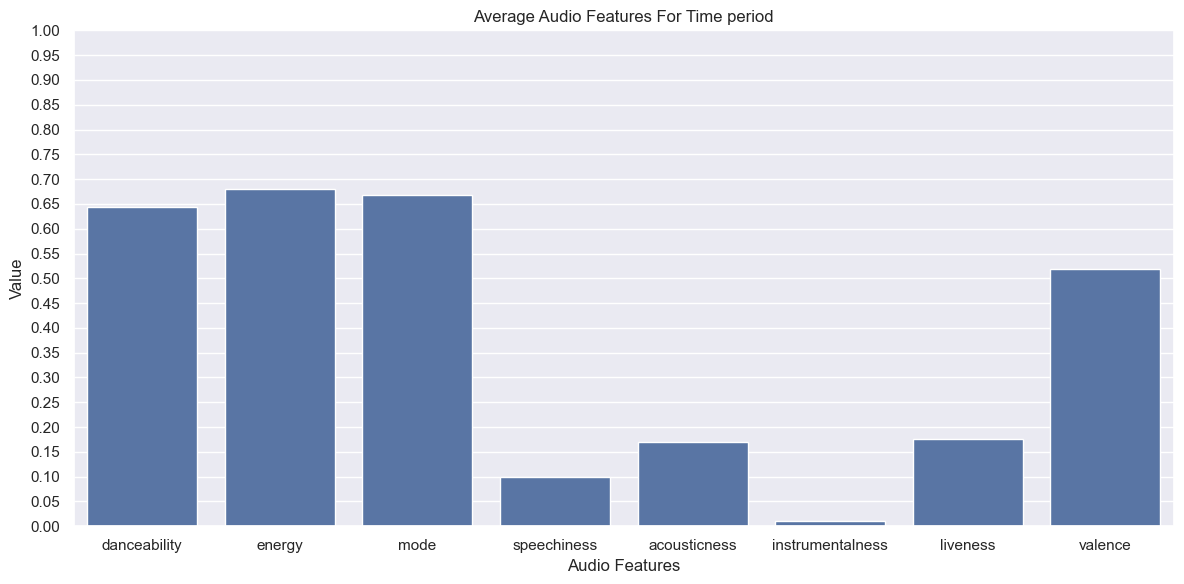

['Average beat per minute: 122',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '67% of songs are in major',
 '33% of songs are in major',
 'Most songs are in C#/Db']

In [169]:
print('These are the average audio features for the time period 2000-2024')
agg_chart_print(chart_with_audio_features)

### Changes in characteristics over time 

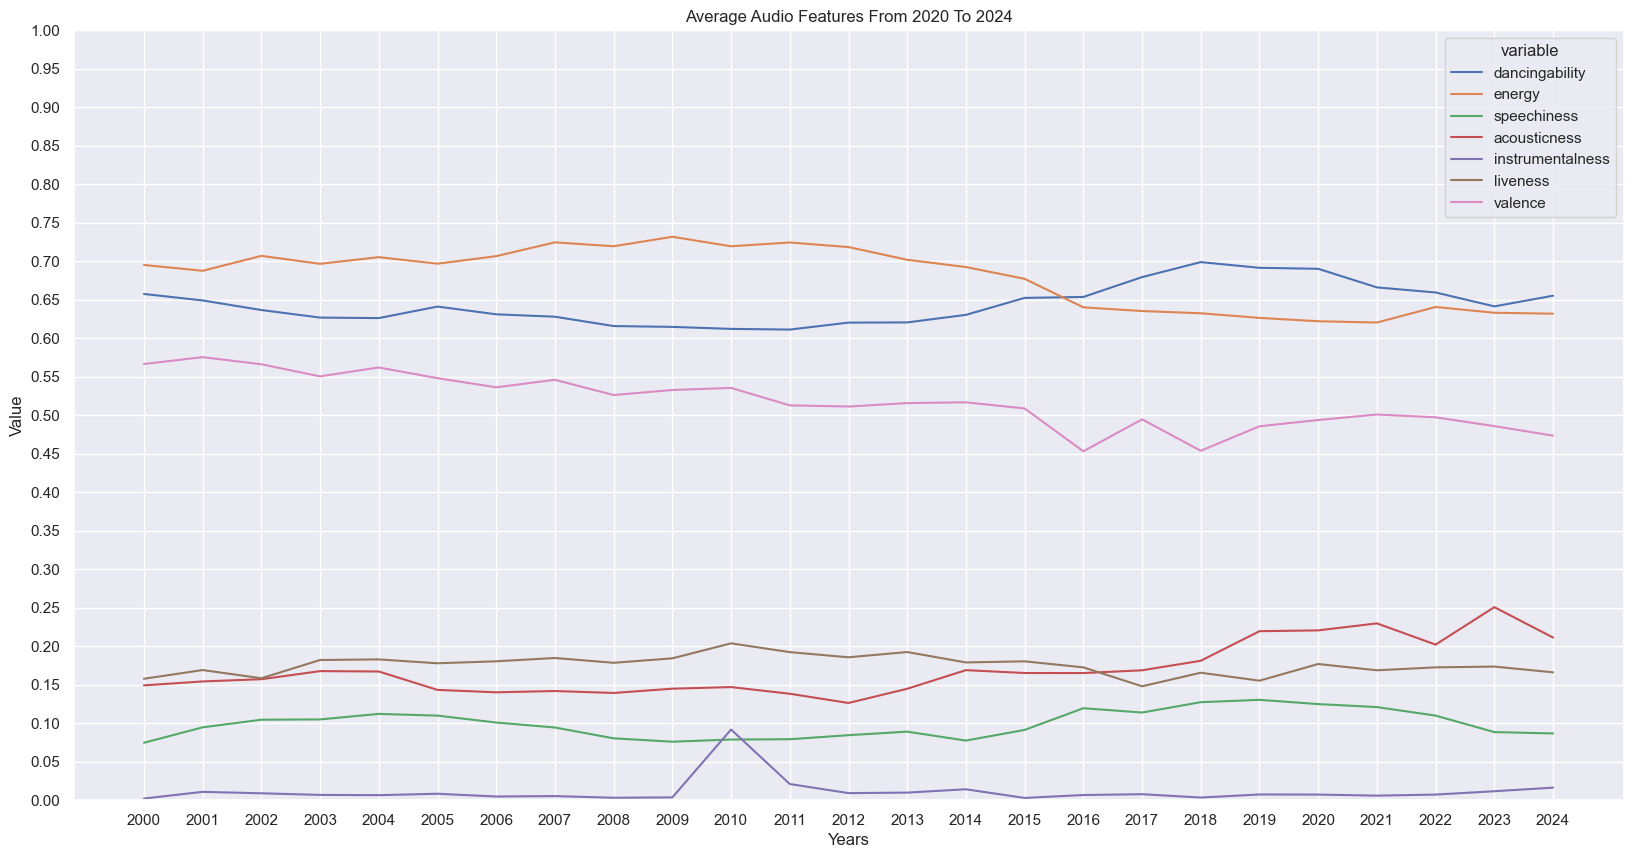

In [170]:
# visualize audio features year over year from 2020 to 2024
# listing columns to be plotted
columns_to_plot = ['dancingability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# transforming DataFrame for easier plotting and selecting columns to plot
melted_df = chart_aggregated_yearly.melt(id_vars=['year'], value_vars=columns_to_plot, var_name='variable', value_name='value')

# plotting the data
plt.figure(figsize=(20, 10))
sns.lineplot(data=melted_df, x='year', y='value', hue='variable')

# setting ticks for each year
plt.xticks(ticks=melted_df['year'].unique())

# setting y-axis scale from 0.0 to 1.0
plt.ylim(0.0, 1.0)

# creating tick range
ticks = [x/20 for x in range(0, 21)]
plt.yticks(ticks)

# adding labels and title
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Average Audio Features From 2020 To 2024')

plt.show()

### Difference between top chart placements and remaining

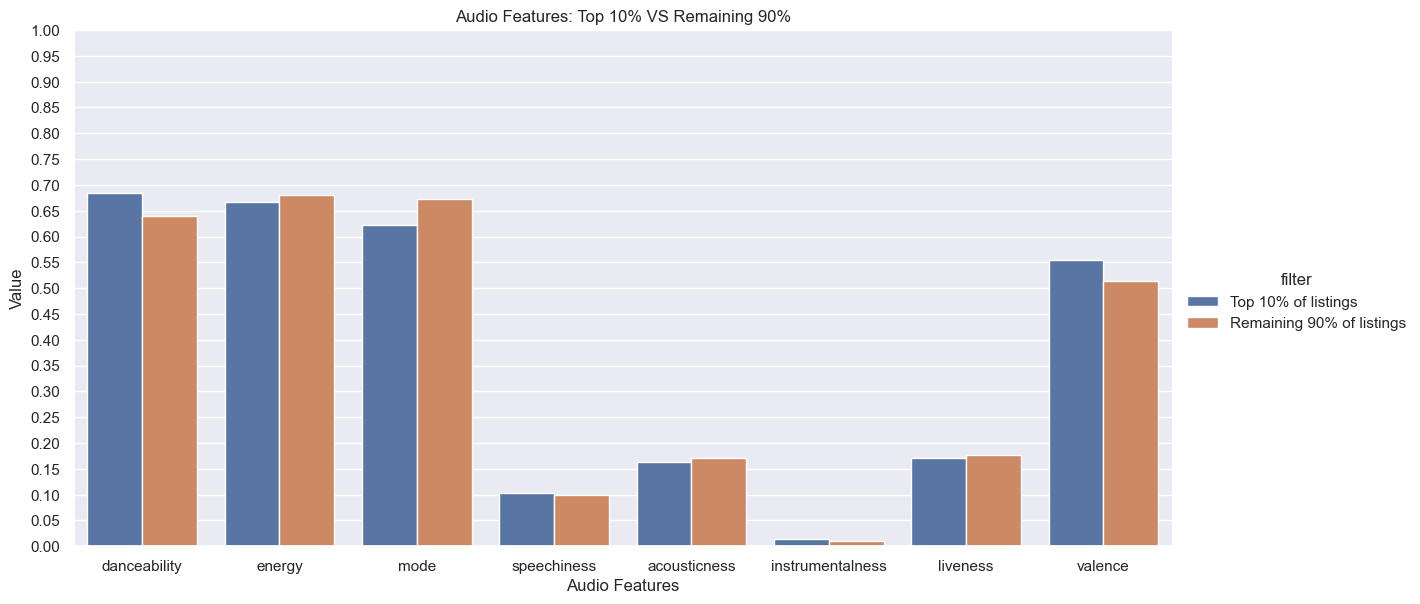

In [171]:
# aggregating audio features
top10_chart_df = agg_audio_features(filtered_df)
top90_chart_df = agg_audio_features(remaining_df)

# adding year column to each dataframe
top10_chart_df['filter'] = 'Top 10% of listings'
top90_chart_df['filter'] = 'Remaining 90% of listings'

# combining tow dataframe into one 
combined_chart_df = pd.concat([top10_chart_df, top90_chart_df])

# plotting top 10% and remaining 90% side by side
sns.catplot(
    data=combined_chart_df,
    x='feature',
    y='value',
    hue='filter',
    kind='bar',
    height=6,
    aspect=2
)

# set y axis limit
plt.ylim(0, 1.0)

# creating tick range
ticks = [x/20 for x in range(0, 21)]
plt.yticks(ticks)

 # adding labels and title
plt.xlabel('Audio Features')
plt.ylabel('Value')
plt.title('Audio Features: Top 10% VS Remaining 90%')

plt.show()

## Listener preferences

### Decrease in song duration

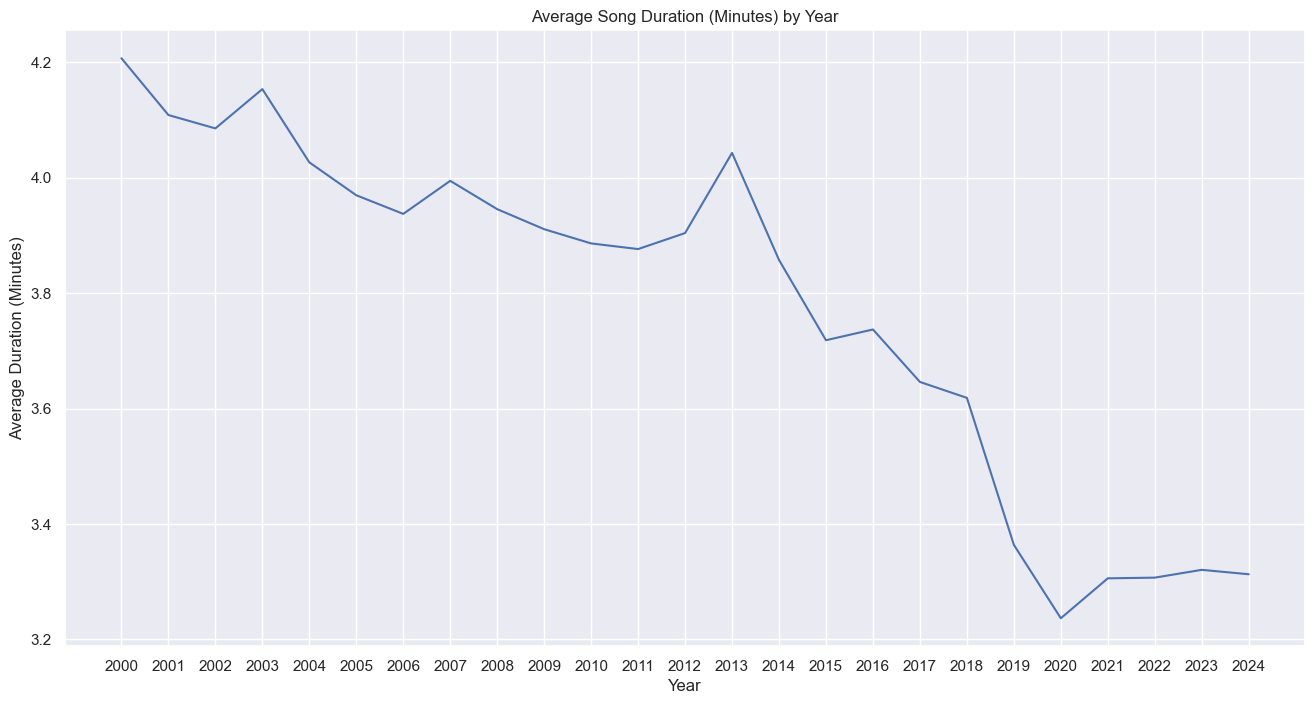

In [172]:
# extracting year form chart_week
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# converting song duration from milliseconds to minutes
chart_with_metadata['duration_minutes'] = chart_with_metadata['duration_ms'] / 60000

# grouping by year and calculate the average duration
average_duration_per_year = chart_with_metadata.groupby('year')['duration_minutes'].mean().reset_index()

# plotting the data
plt.figure(figsize=(16, 8))
sns.lineplot(data=average_duration_per_year, x='year', y='duration_minutes')
plt.title('Average Song Duration (Minutes) by Year')
plt.xlabel('Year')
plt.xticks(ticks=average_duration_per_year['year'])
plt.ylabel('Average Duration (Minutes)')
plt.show()

### Increase of explicit lyrics 

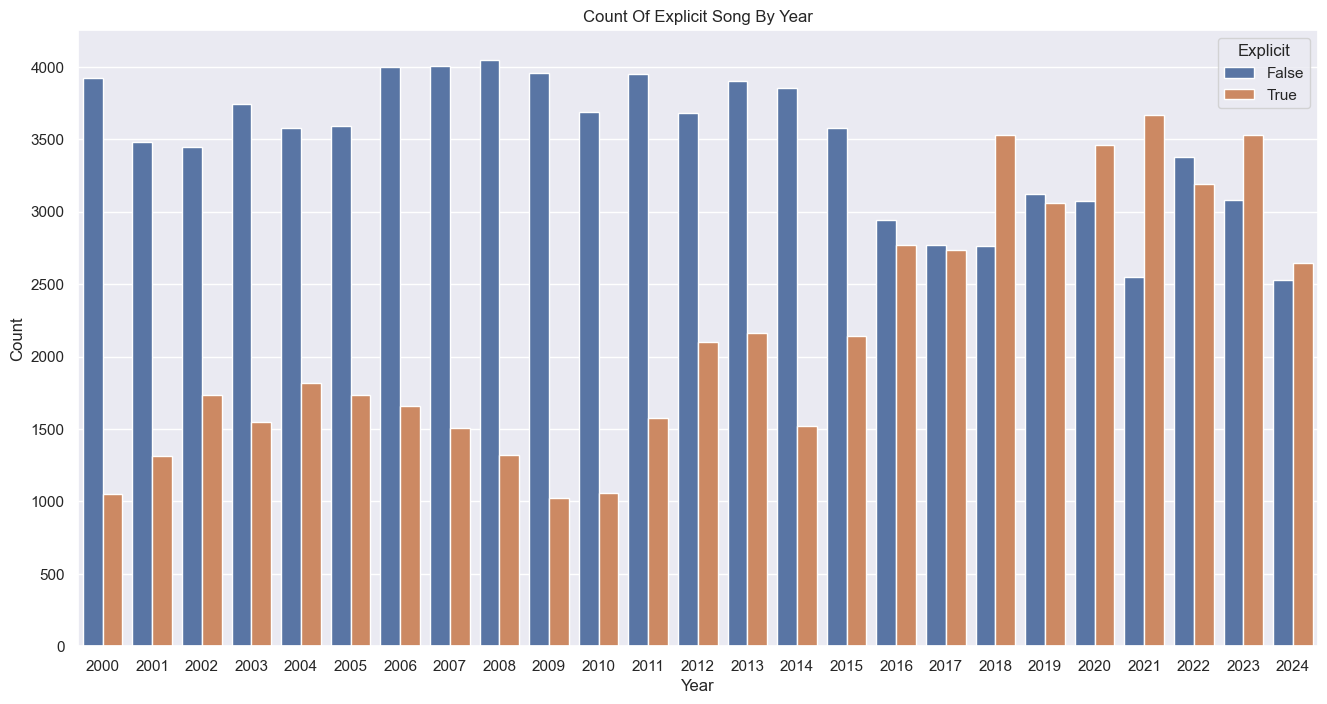

In [173]:
# extracting year from chart_week
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# grouping by year and explicit and counting occurrences
grouped_data = chart_with_metadata.groupby(['year', 'explicit']).size().reset_index(name='count')

# plotting the data
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_data, x='year', y='count', hue='explicit')
plt.title('Count Of Explicit Song By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Explicit')
plt.show()

### Increase of singles 

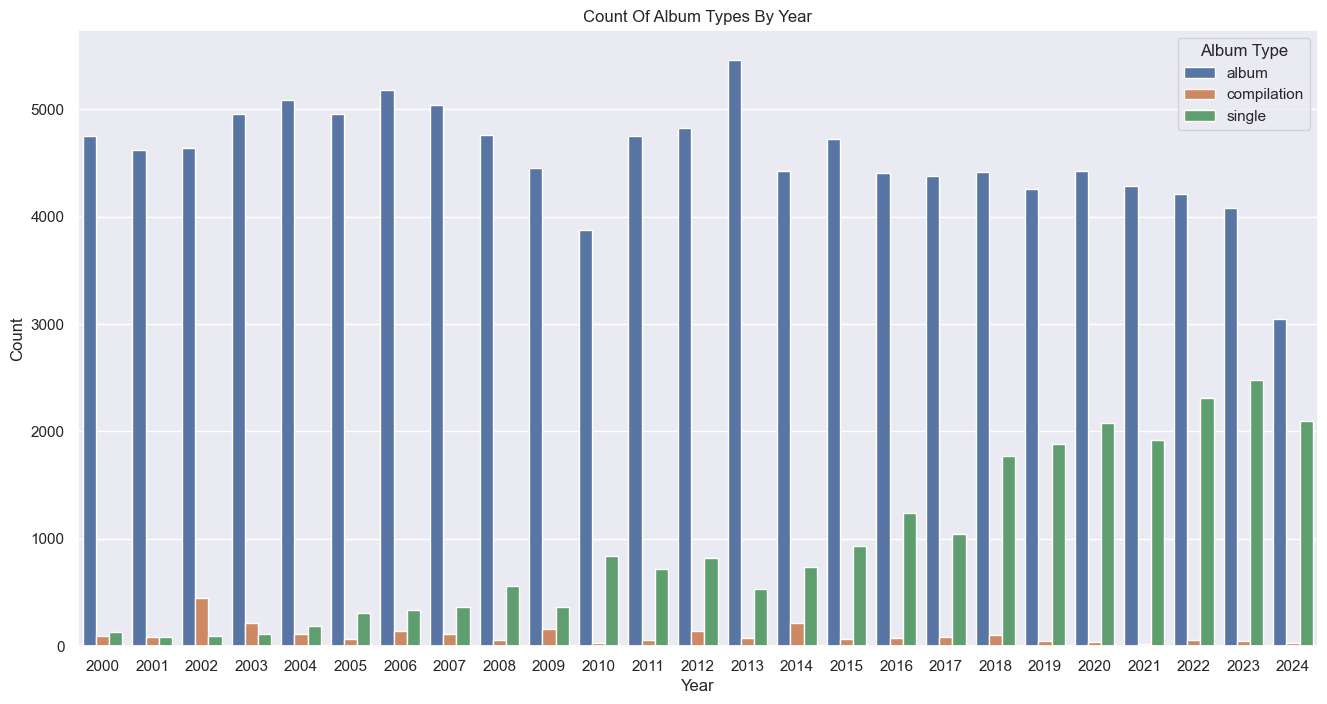

In [174]:
# extracting year from chart_wee
chart_with_metadata['year'] = chart_with_metadata['chart_week'].dt.year

# grouping by year and album_type and counting occurrences
grouped_data = chart_with_metadata.groupby(['year', 'album_type']).size().reset_index(name='count')

# plotting the data
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_data, x='year', y='count', hue='album_type')
plt.title('Count Of Album Types By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Album Type')
plt.show()

## Artist influence on chart placements

### Correlation between Spotify popularity score and chart placements

Correlation between Spotify Popularity Score and Chart Placements: -0.12772519355847758


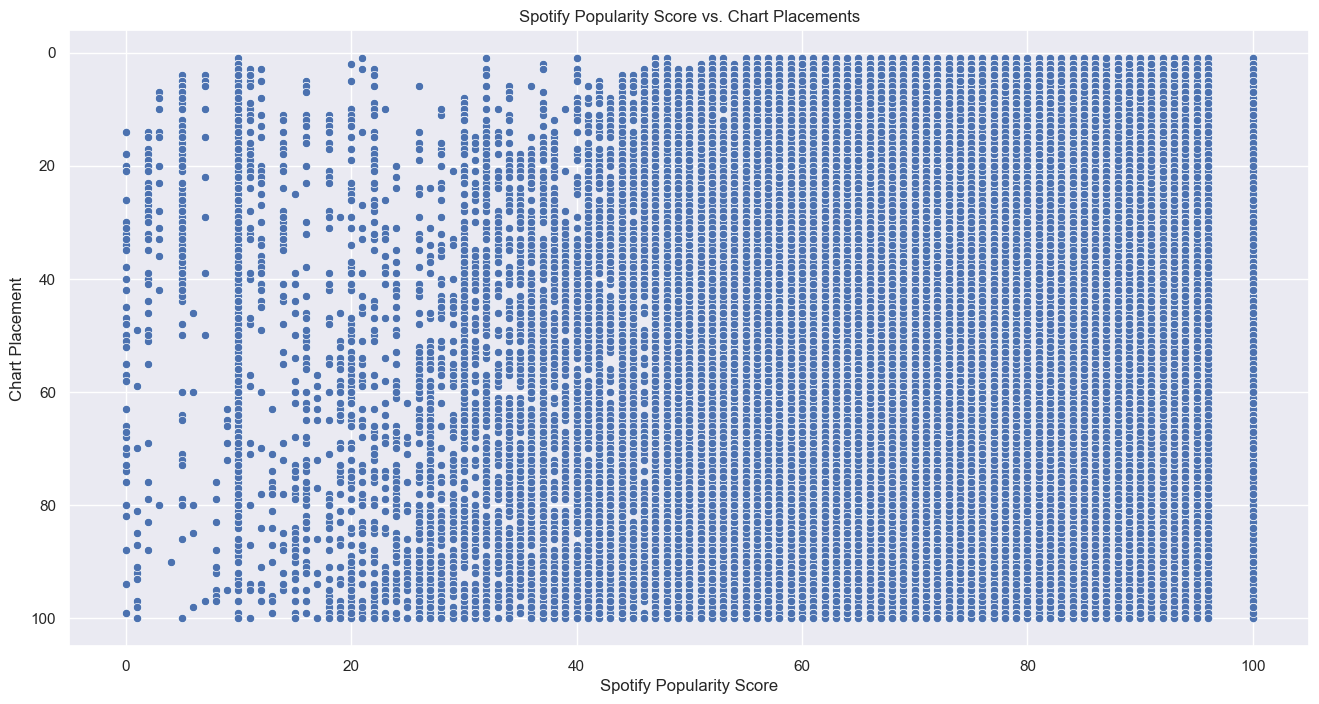

In [175]:
# calculate the correlation between Spotify popularity score and chart placements
correlation_popularity = chart_with_metadata['popularity'].corr(chart_with_metadata['list_position'])

print(f"Correlation between Spotify Popularity Score and Chart Placements: {correlation_popularity}")

# Plotting the relationship
plt.figure(figsize=(16, 8))
sns.scatterplot(data=chart_with_metadata, x='popularity', y='list_position')
plt.title('Spotify Popularity Score vs. Chart Placements')
plt.xlabel('Spotify Popularity Score')
plt.ylabel('Chart Placement')

# invert x-axis to show 1 as the best score
plt.gca().invert_yaxis()

plt.show()

### Correlation between Spotify follower count and chart placements

Correlation between Spotify Followers and Chart Placements: -0.12307256957593168


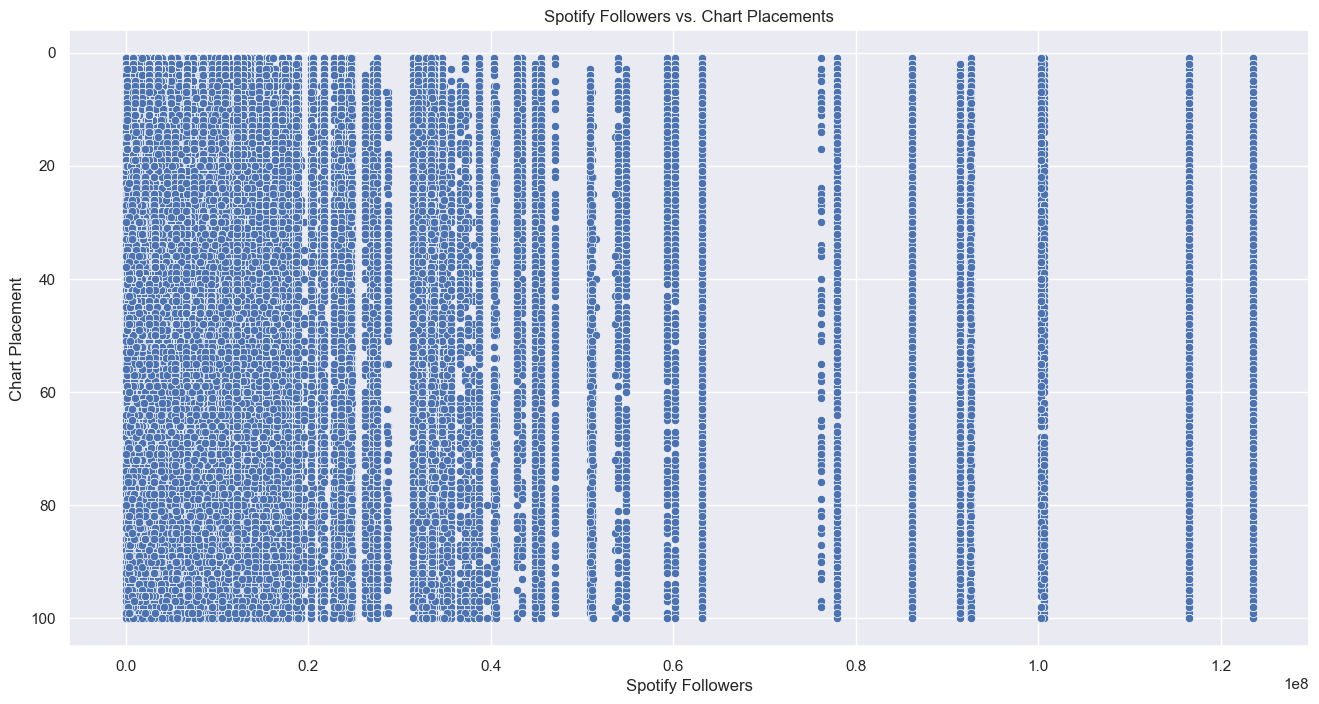

In [176]:
# calculate the correlation between Spotify followers and chart placements
correlation_followers = chart_with_metadata['followers'].corr(chart_with_metadata['list_position'])

print(f"Correlation between Spotify Followers and Chart Placements: {correlation_followers}")

# plotting the relationship
plt.figure(figsize=(16, 8))
sns.scatterplot(data=chart_with_metadata, x='followers', y='list_position')
plt.title('Spotify Followers vs. Chart Placements')
plt.xlabel('Spotify Followers')
plt.ylabel('Chart Placement')

# invert x-axis to show 1 as the best score
plt.gca().invert_yaxis()

plt.show()

## Chart success

### Billboard features

In between the years 2000 and 2024, a song is on average featured 11 times.


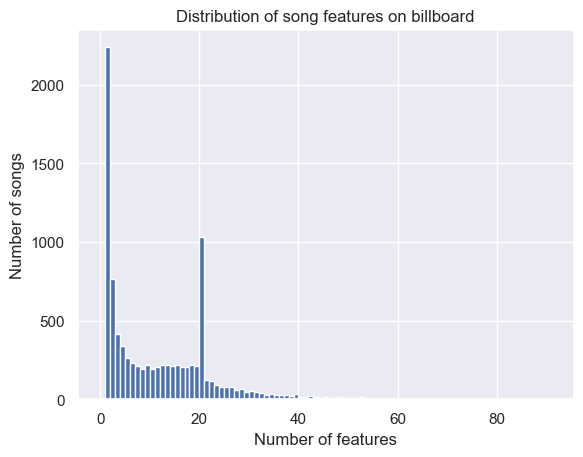

In [177]:
# getting the average number of weeks a song is featured in charts
average_feature_count = round(unique_tracks_count.mean())
print(f'In between the years 2000 and 2024, a song is on average featured {average_feature_count} times.')

unique_tracks_count.hist(bins=range(0, unique_tracks_count.max() + 1, 1))
plt.xlabel("Number of features")
plt.ylabel("Number of songs")
plt.title("Distribution of song features on billboard")
plt.show()

### Continued billboard success 

In [178]:
# counting number of unique songs
unique_tracks_count.count()

# counting number of songs that are featured more than the average 
above_average_count = unique_tracks_count[unique_tracks_count > 11].count()

# getting percentage of songs that are featured more than the average
above_average_percentage = round((above_average_count / unique_tracks_count.count()) * 100)
print (f'{above_average_percentage}% of songs got featured more then {average_feature_count} times, which is the average.')

43% of songs got featured more then 11 times, which is the average.
